#Mushroom Classification
###This project explores mushroom classification based off of edibility versus poisonous using machine learning techniques on the Mushroom Classification dataset from the UCI Machine Learning Repository (https://www.kaggle.com/datasets/uciml/mushroom-classification).

The primary task involves classifying mushrooms into edible or poisonous categories based on their features, as defined by the Mushroom Classification dataset from the UCI Machine Learning Repository.

My approach frames the problem as a binary classification task, utilizing various machine learning algorithms to predict the mushroom's class.

I used XGBoost and KNN models to assess their performance. Ultimately, the best-performing model achieved an accuracy of 99%, indicating strong predictive capability on this dataset.

#Preprocessing

In [2]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
df=pd.read_csv('mushrooms.csv')
df.head()

class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1                      w                      w         p          w   
2                      w                      w         p          w   
3                      w                      w         p          w   
4                      w                      w         p          w   

  ring-number ring-type spore-print-color population habitat  
0           o         p                 k          s       u  
1           o         p                 n          n       g  
2           o         p                 n          n       m  
3           o         p                 k          s       u  
4           o         e                 n          a       g  

[5 rows x 23 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [5]:
shape = df.shape
print("Shape of DF:", shape)


Shape of DF: (8124, 23)


#Data:

Type: Tabular data (CSV)

Input: Mushroom features encoded as categorical variables

Output: Classification label indicating whether the mushroom is edible or poisonous

Size: 8124 instances, 23 features (excluding the target variable)

Instances:
- Training set: 6499 instances
- Testing set: 1625 instances
- Validation set: Not specified

In [6]:
data_types=df.dtypes
print(data_types)

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object


In [7]:
#missing values
na=df.isnull().sum()
na

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [8]:
dups=df.duplicated().sum()
dups

0

In [9]:
#descriptive statistics
df.describe()

class cap-shape cap-surface cap-color bruises  odor gill-attachment  \
count   8124      8124        8124      8124    8124  8124            8124   
unique     2         6           4        10       2     9               2   
top        e         x           y         n       f     n               f   
freq    4208      3656        3244      2284    4748  3528            7914   

       gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
count          8124      8124       8124  ...                     8124   
unique            2         2         12  ...                        4   
top               c         b          b  ...                        s   
freq           6812      5612       1728  ...                     4936   

       stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
count                    8124                   8124      8124       8124   
unique                      9                      9         1          4   
top                         w                      w         p          w   
freq                     4464                   4384      8124       7924   

       ring-number ring-type spore-print-color population habitat  
count         8124      8124              8124       8124    8124  
unique           3         5                 9          6       7  
top              o         p                 w          v       d  
freq          7488      3968              2388       4040    3148  

[4 rows x 23 columns]

#Encoding &Correlation matrix

In [10]:
df_encoded = pd.get_dummies(df)

print(df_encoded.head())


   class_e  class_p  cap-shape_b  cap-shape_c  cap-shape_f  cap-shape_k  \
0    False     True        False        False        False        False   
1     True    False        False        False        False        False   
2     True    False         True        False        False        False   
3    False     True        False        False        False        False   
4     True    False        False        False        False        False   

   cap-shape_s  cap-shape_x  cap-surface_f  cap-surface_g  ...  population_s  \
0        False         True          False          False  ...          True   
1        False         True          False          False  ...         False   
2        False        False          False          False  ...         False   
3        False         True          False          False  ...          True   
4        False         True          False          False  ...         False   

   population_v  population_y  habitat_d  habitat_g  habitat_l  habi

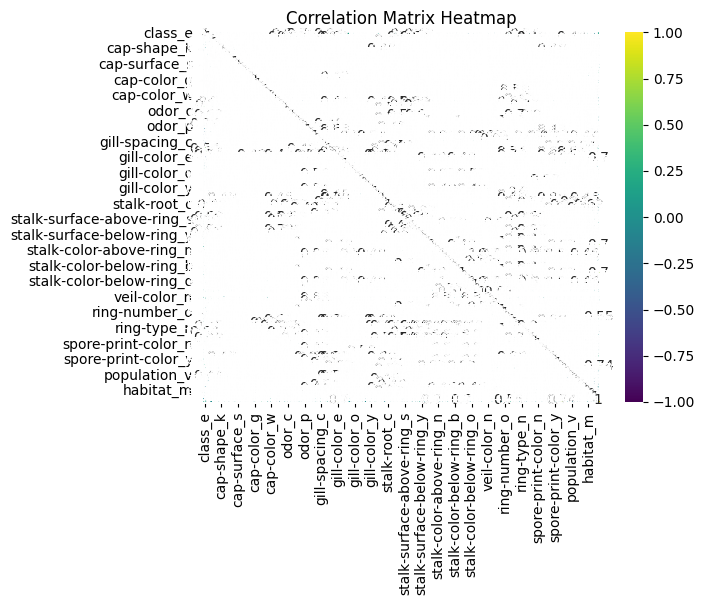

In [28]:
#corelation matrix
correlation_matrix = df_encoded.corr()

#plot using seaborn heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')
plt.title('Correlation Matrix Heatmap')
plt.show()


<ipython-input-26-2ca4c5d149d3>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='cap-color', palette='viridis')


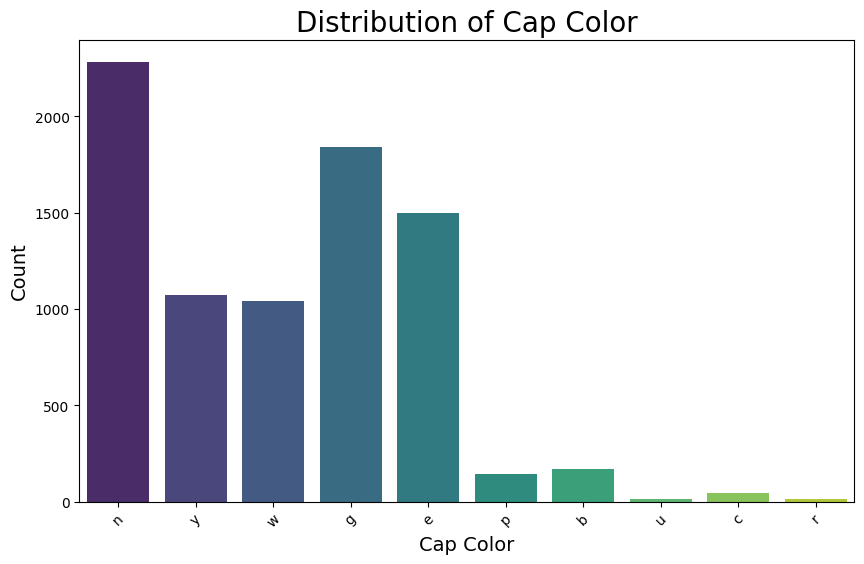

<ipython-input-26-2ca4c5d149d3>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='odor', palette='magma')


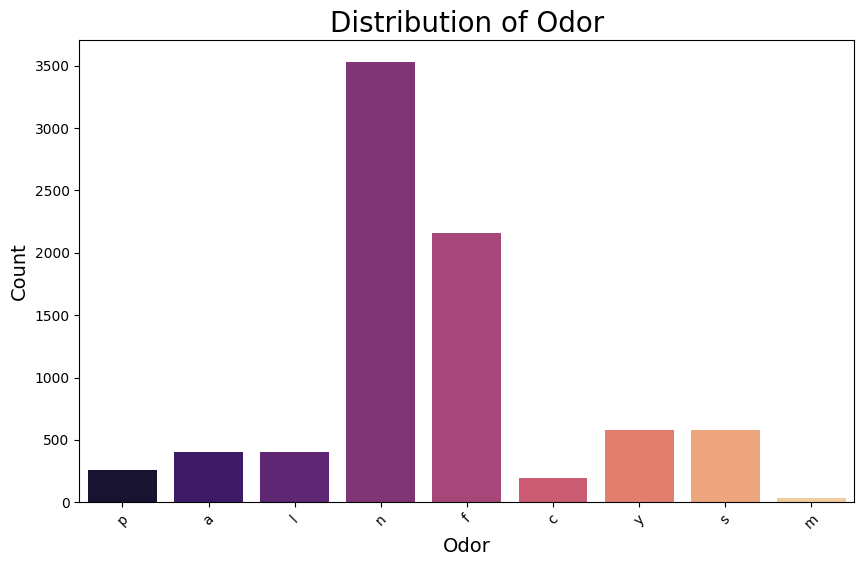

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

#distribution of 'cap-color'
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='cap-color', palette='viridis')
plt.title('Distribution of Cap Color', fontsize=20)
plt.xlabel('Cap Color', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.show()

#distribution of 'odor'
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='odor', palette='magma')
plt.title('Distribution of Odor', fontsize=20)
plt.xlabel('Odor', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.show()



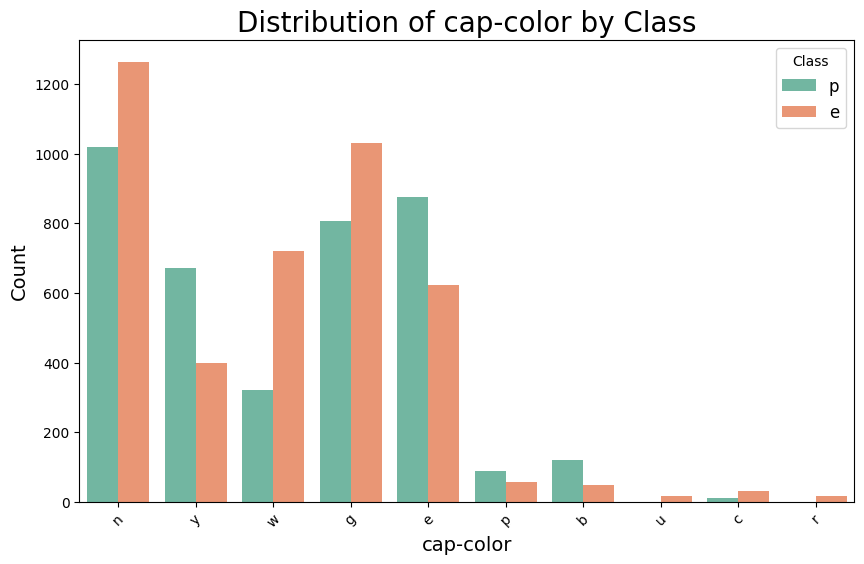

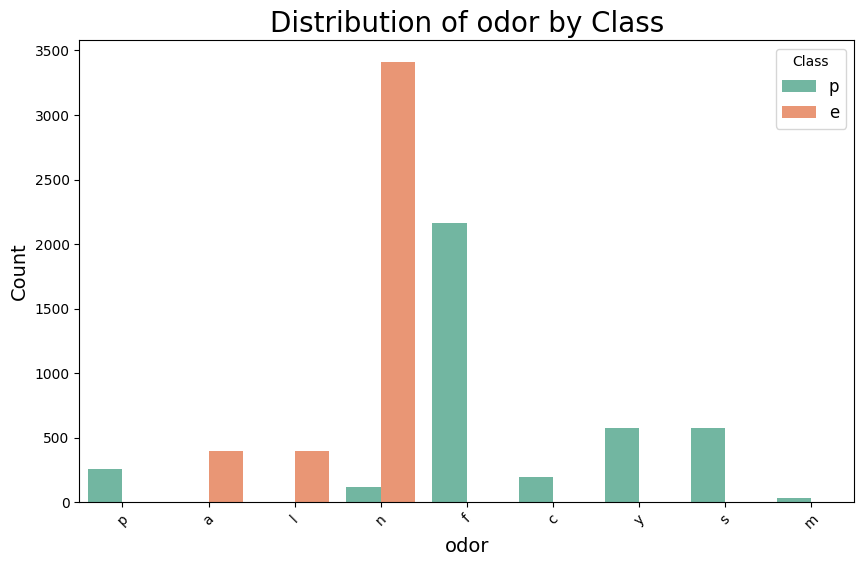

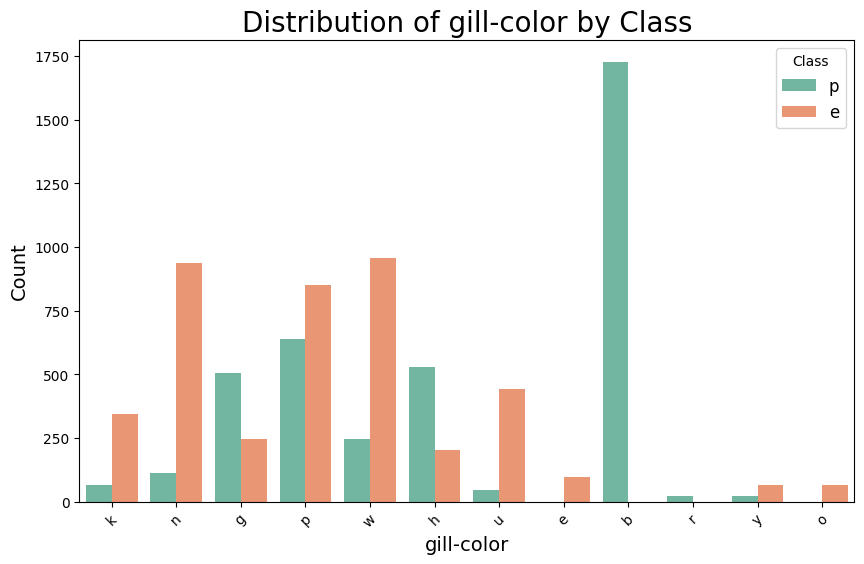

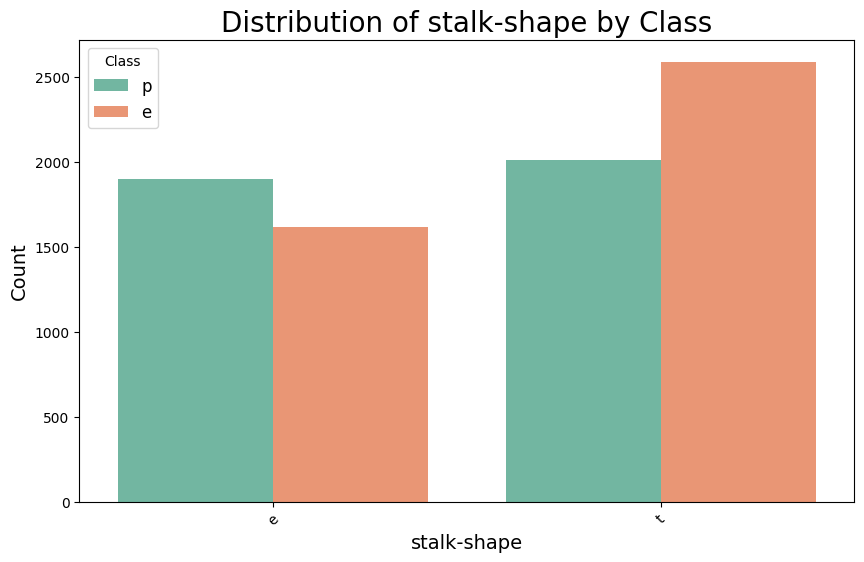

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

features = ['cap-color', 'odor', 'gill-color', 'stalk-shape']

for feature in features:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=feature, hue='class', palette='Set2')
    plt.title(f'Distribution of {feature} by Class', fontsize=20)
    plt.xlabel(feature, fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.xticks(rotation=45)
    plt.legend(title='Class', fontsize=12)
    plt.show()


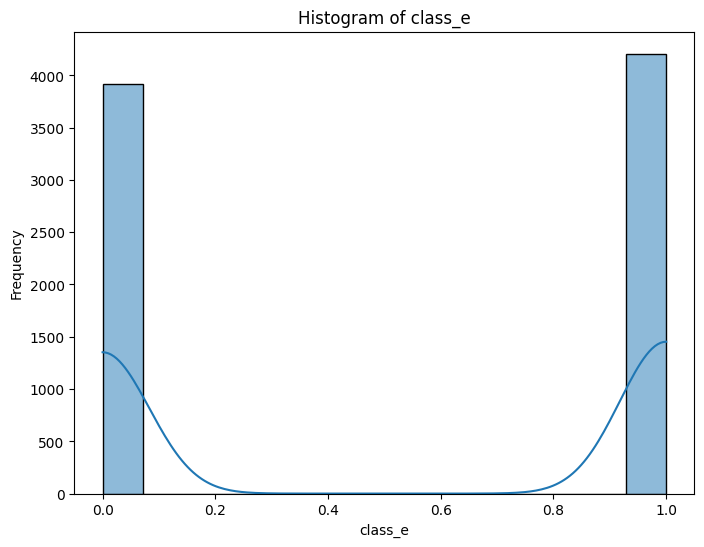

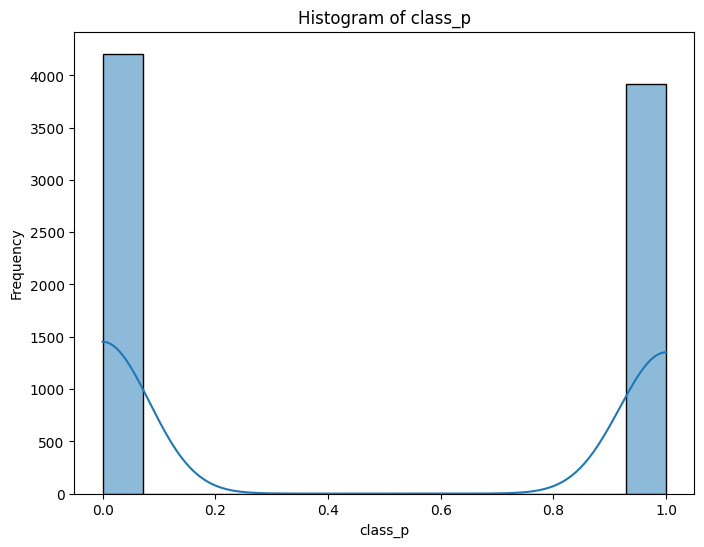

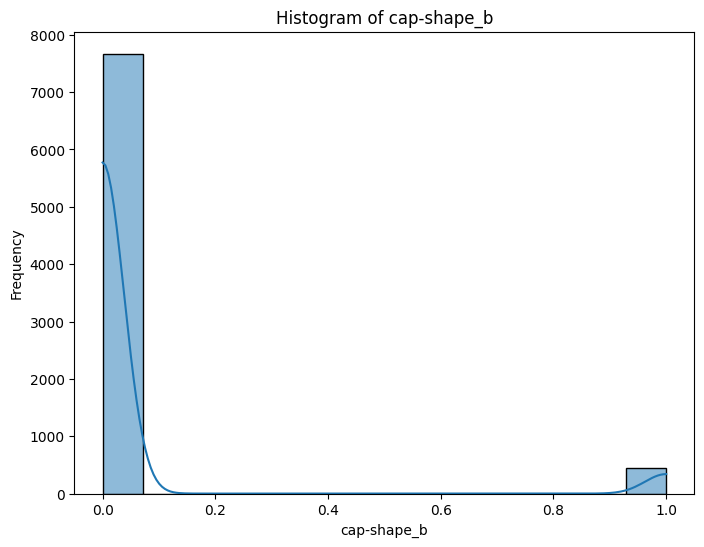

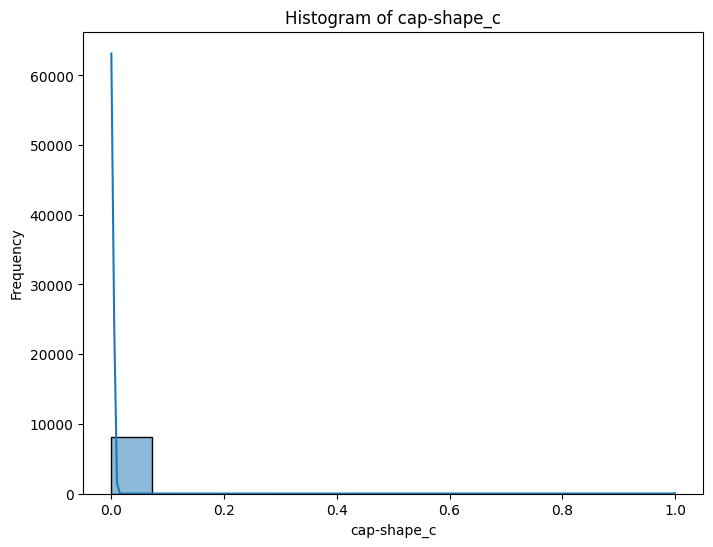

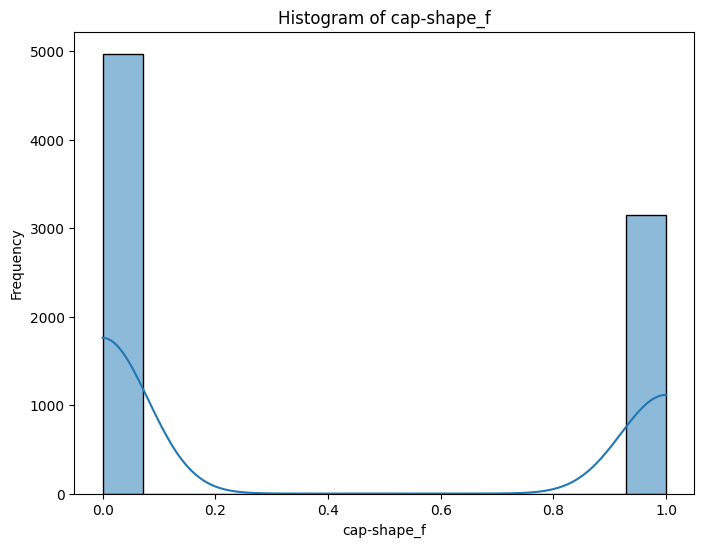

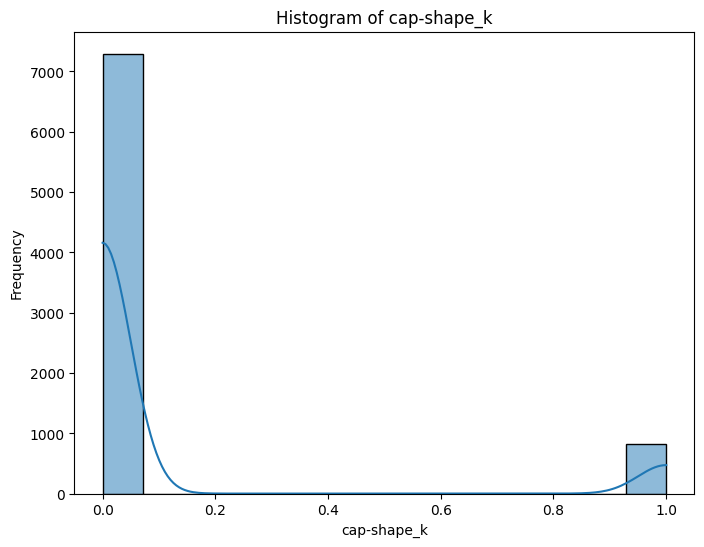

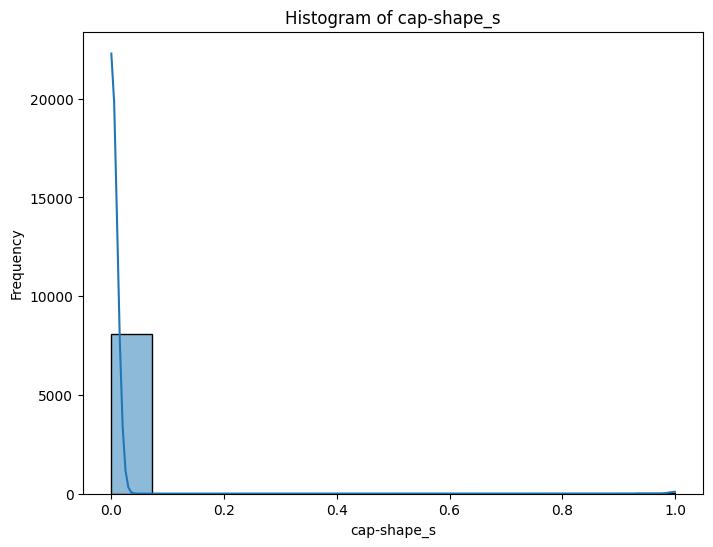

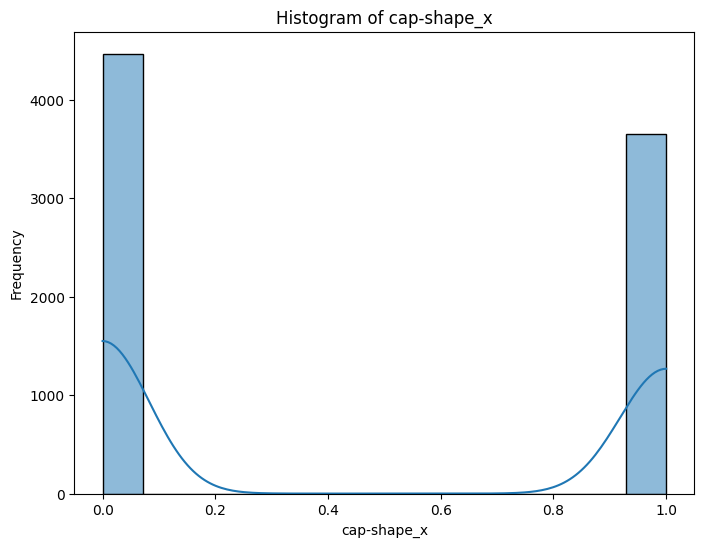

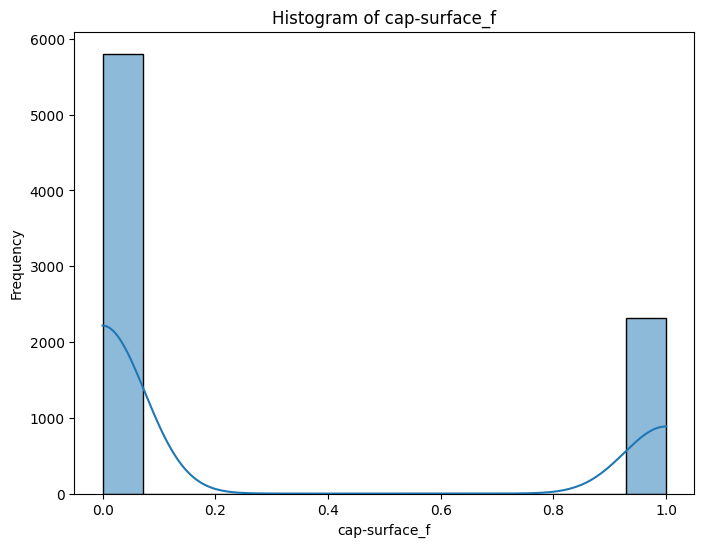

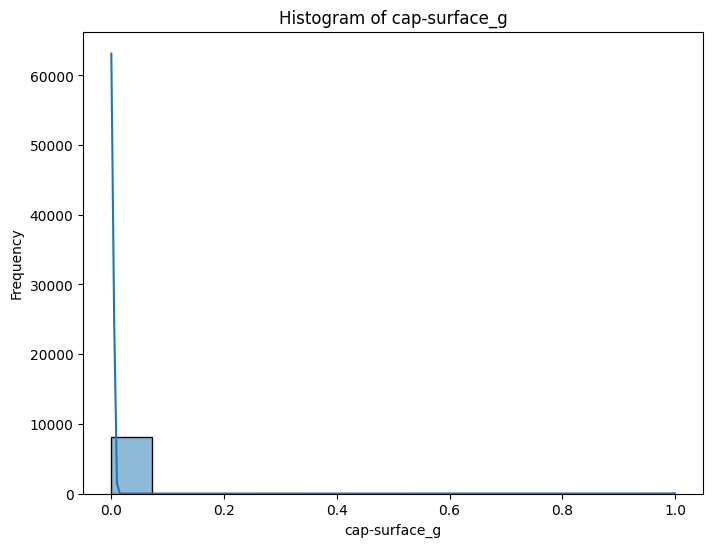

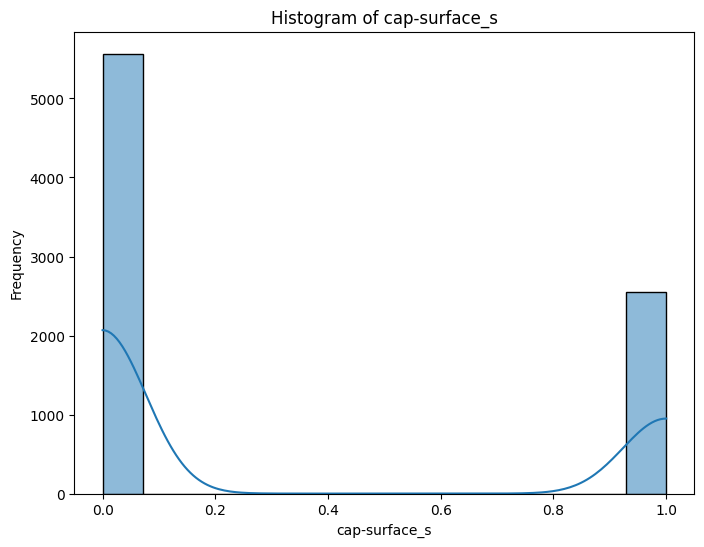

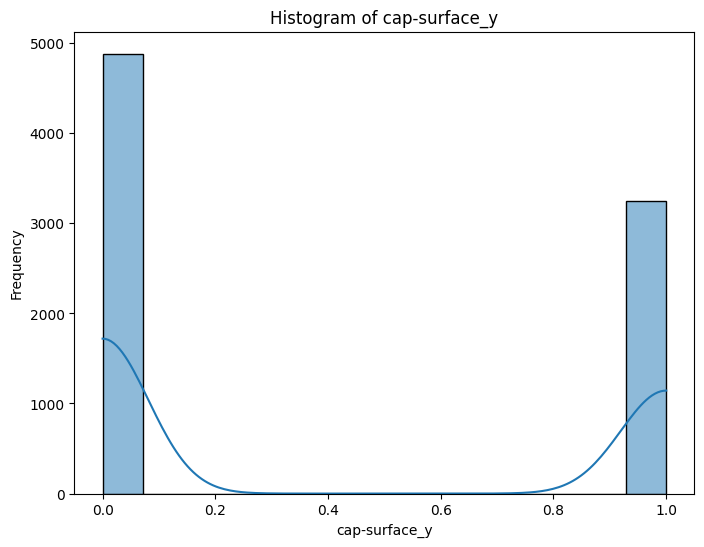

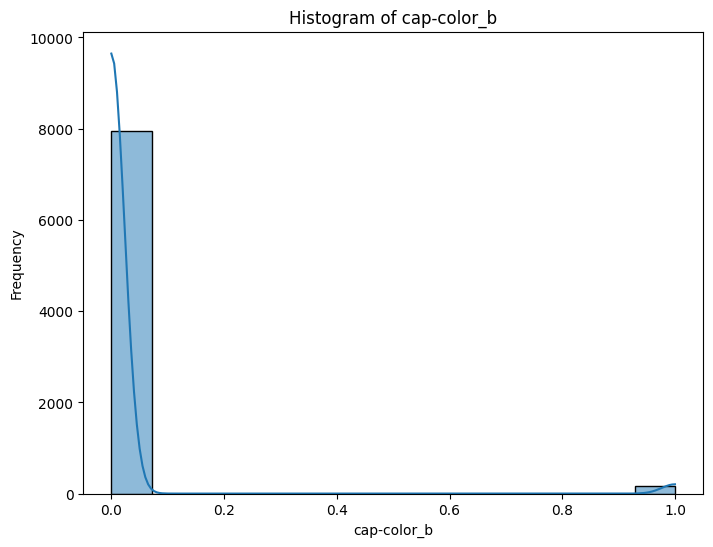

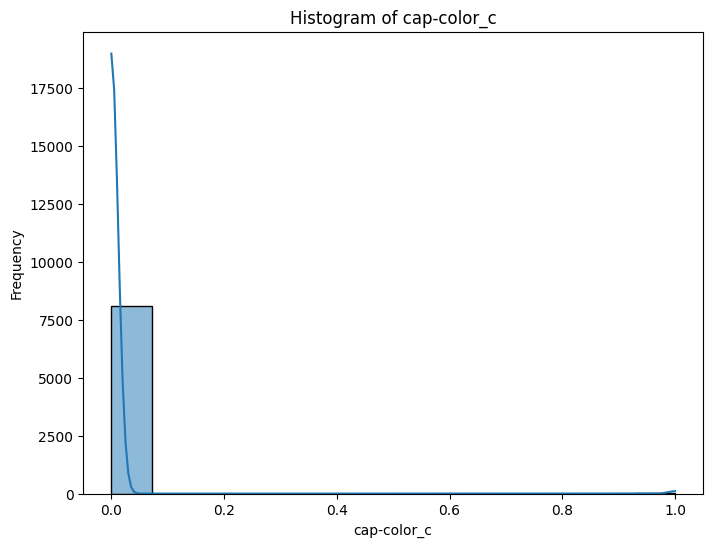

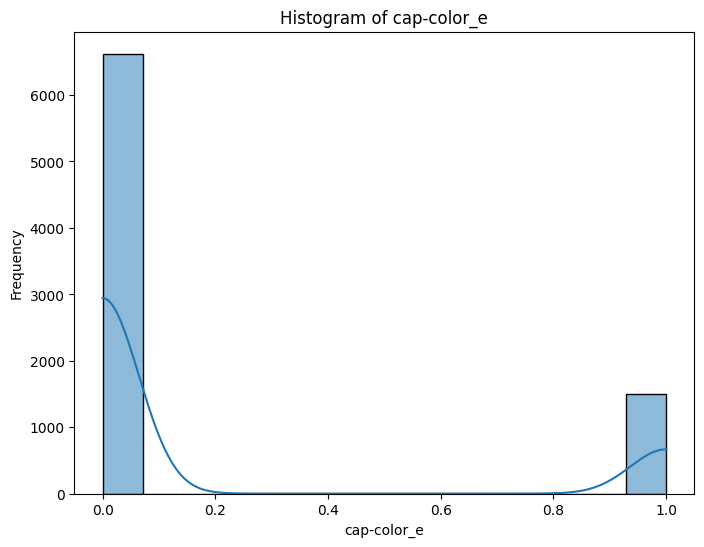

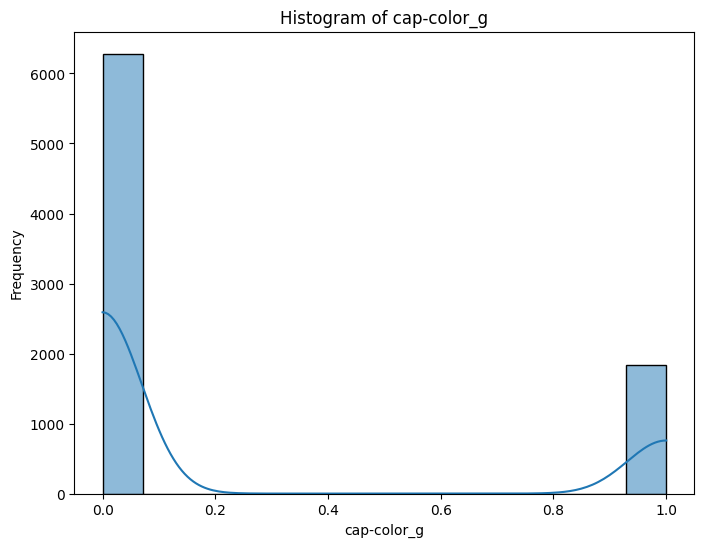

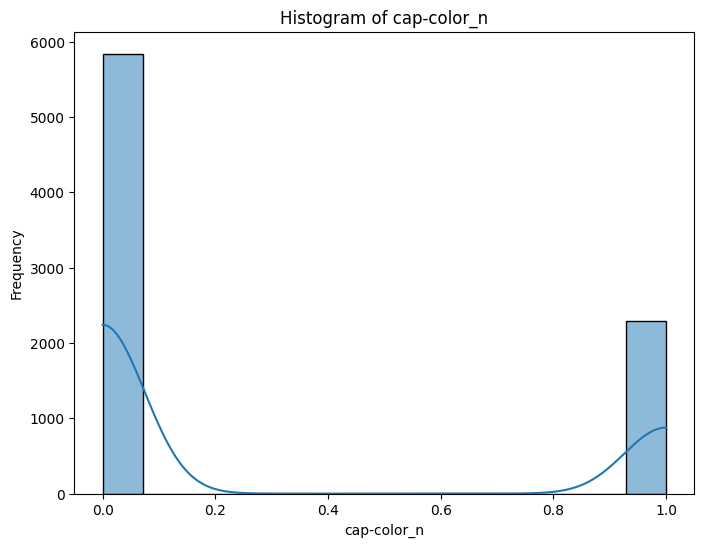

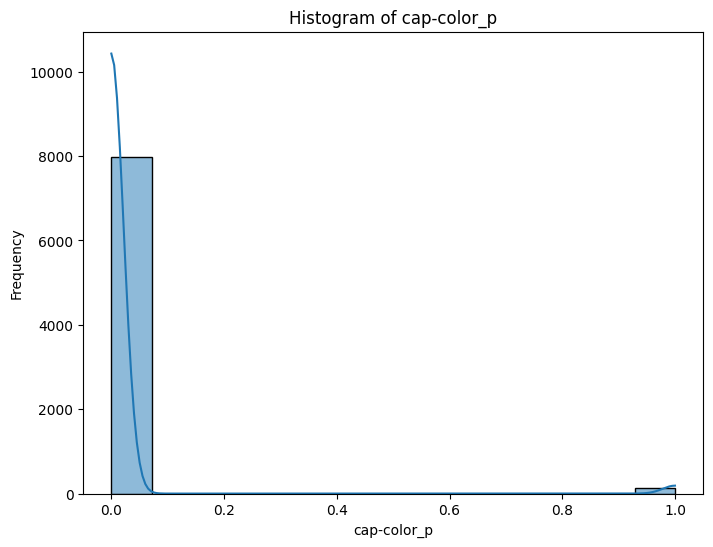

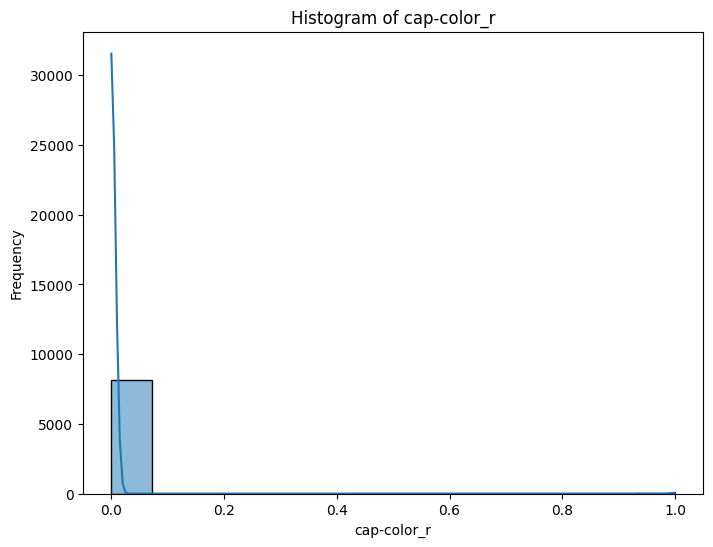

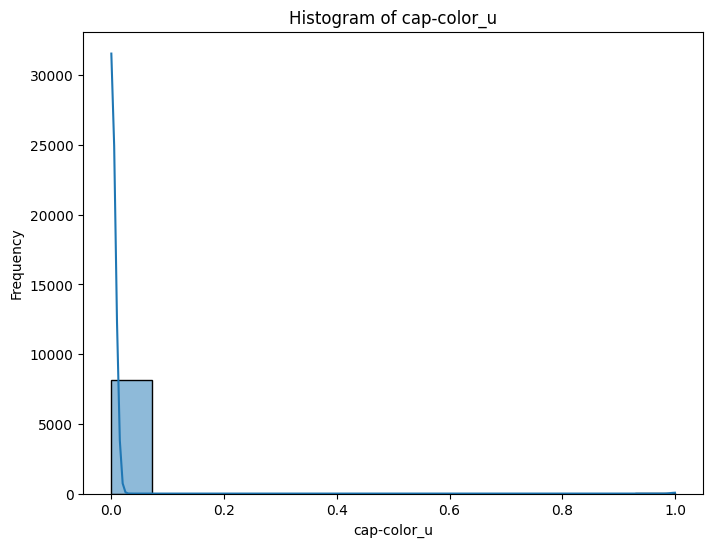

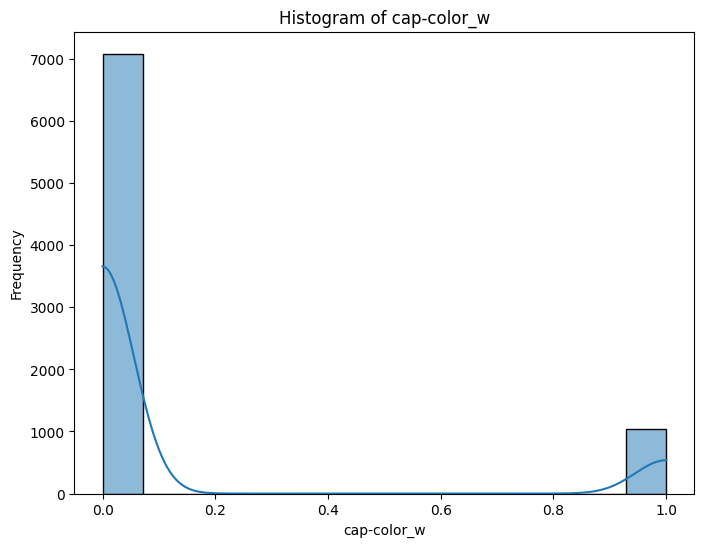

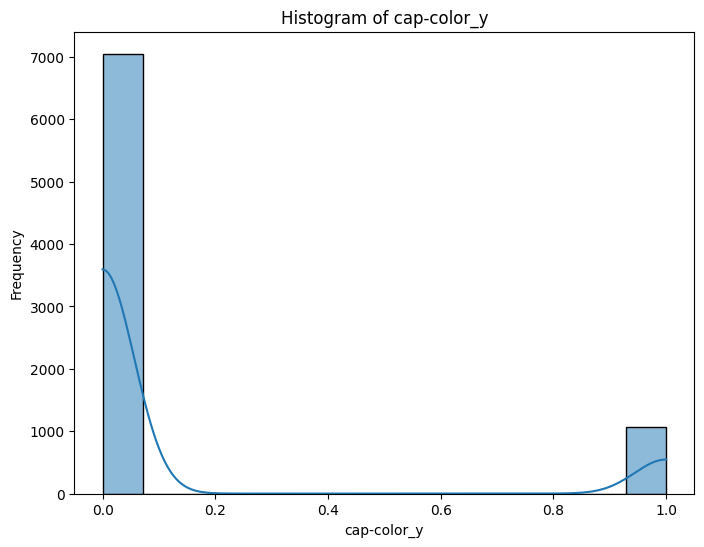

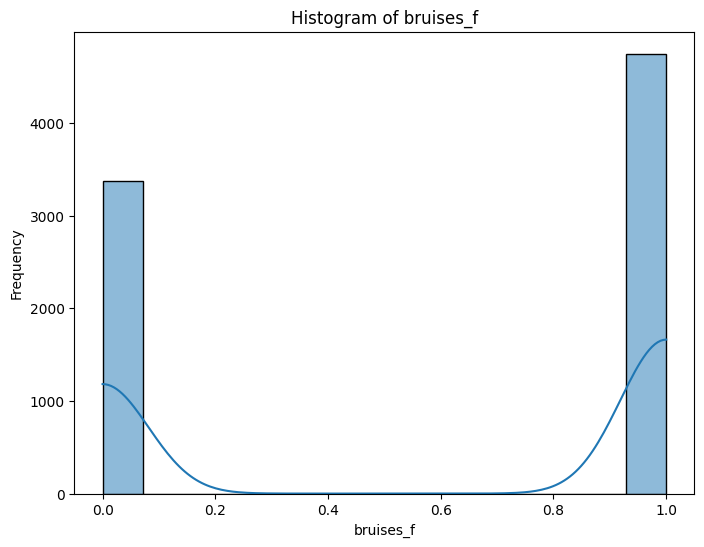

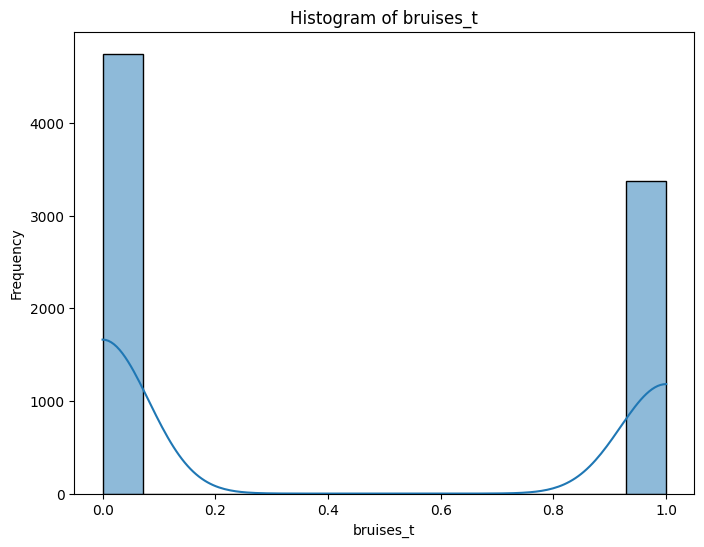

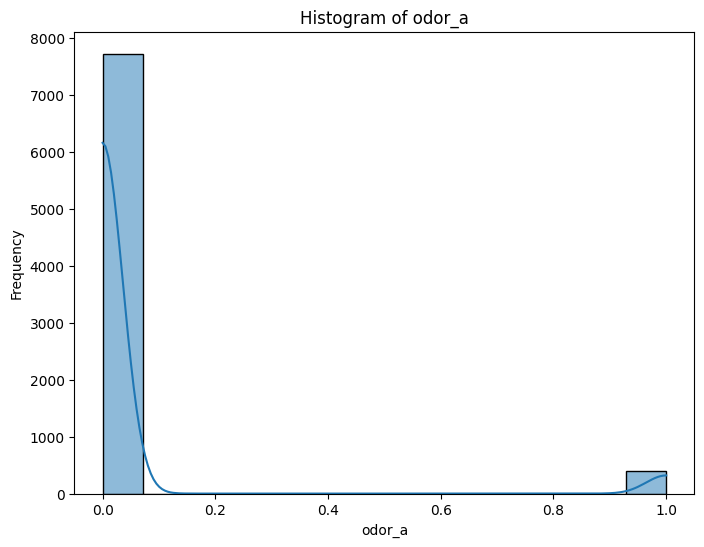

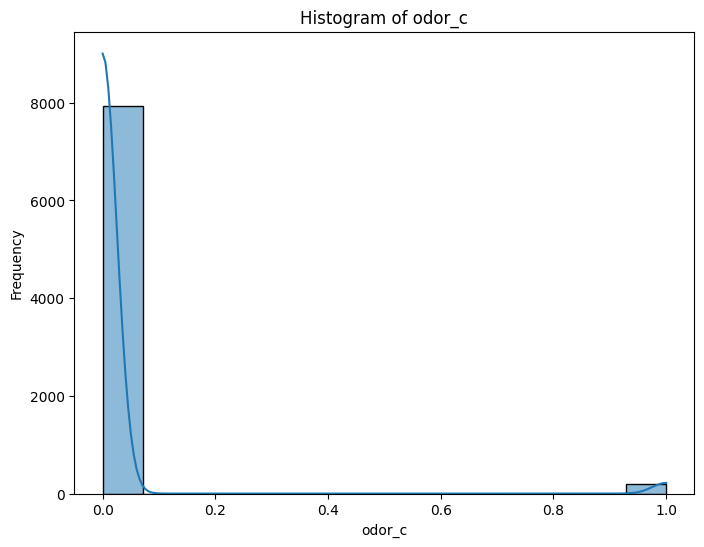

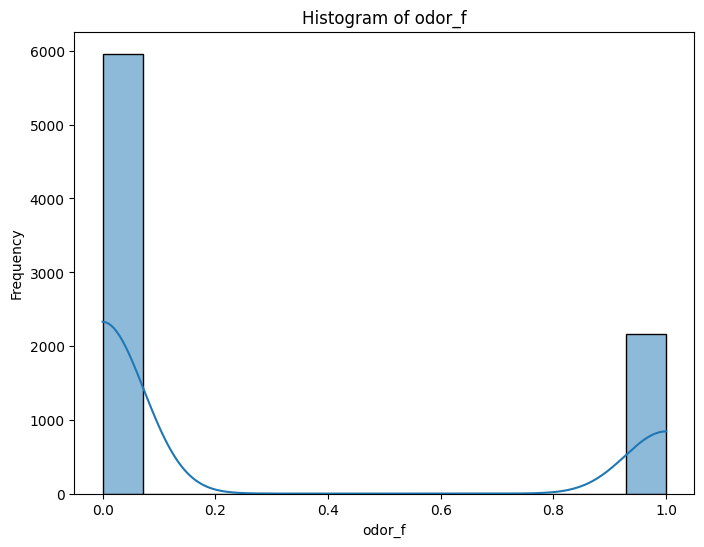

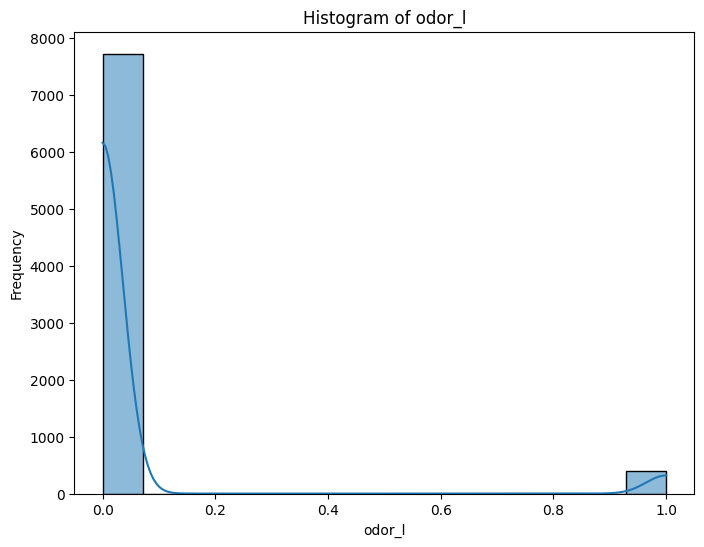

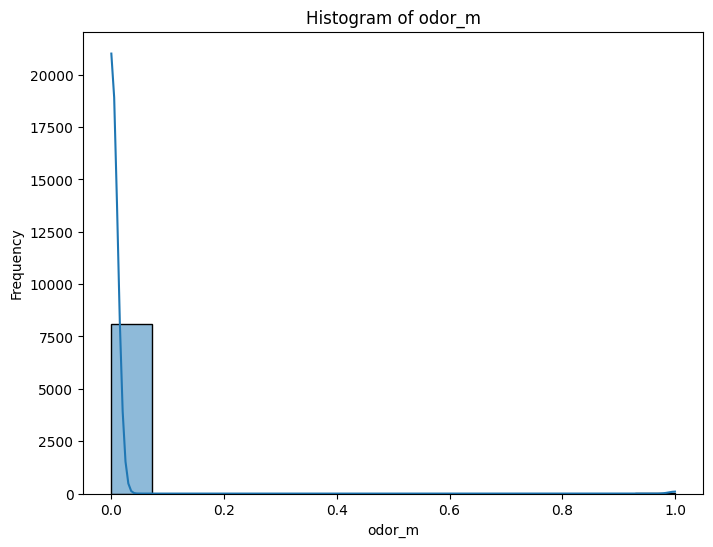

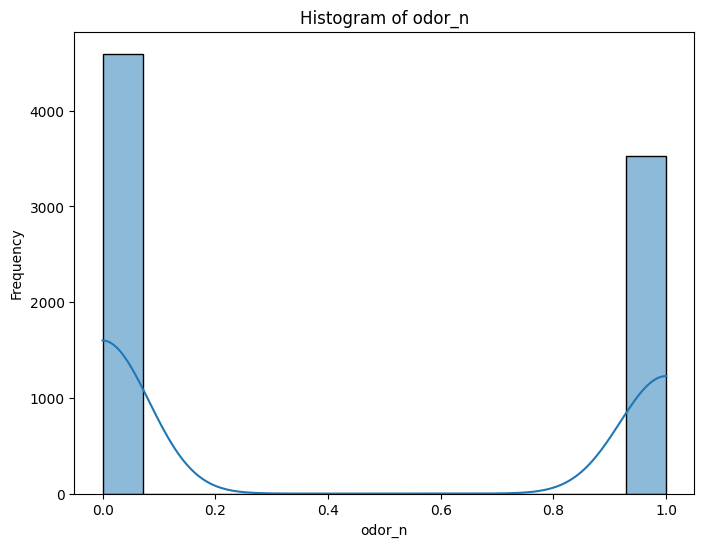

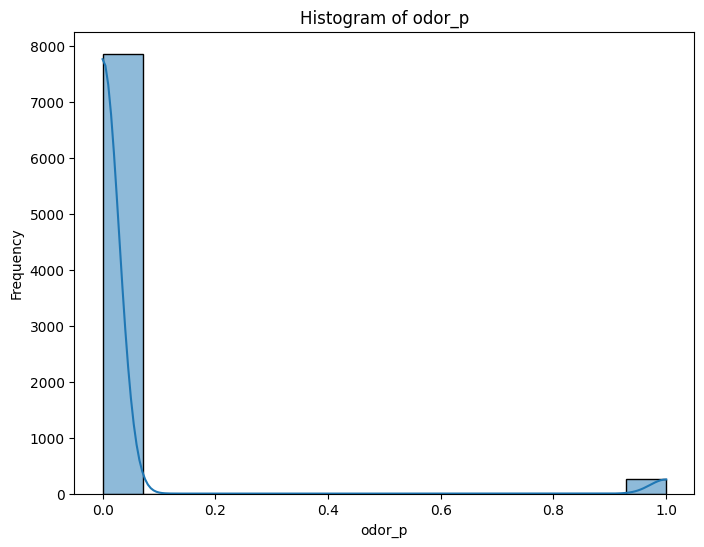

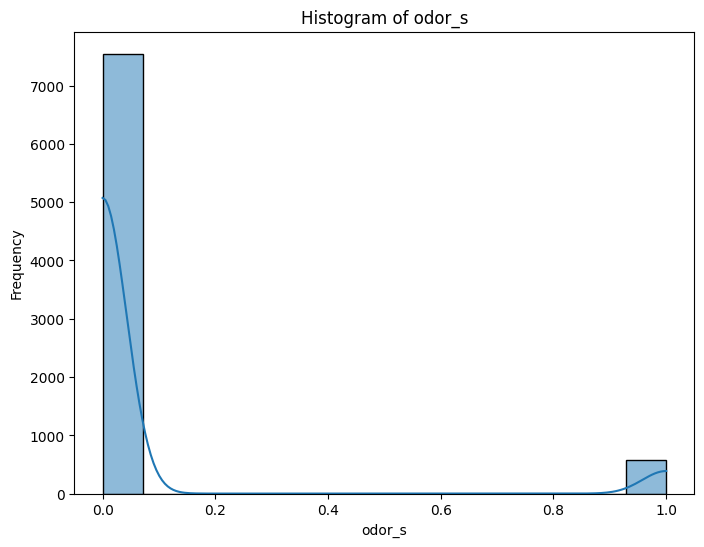

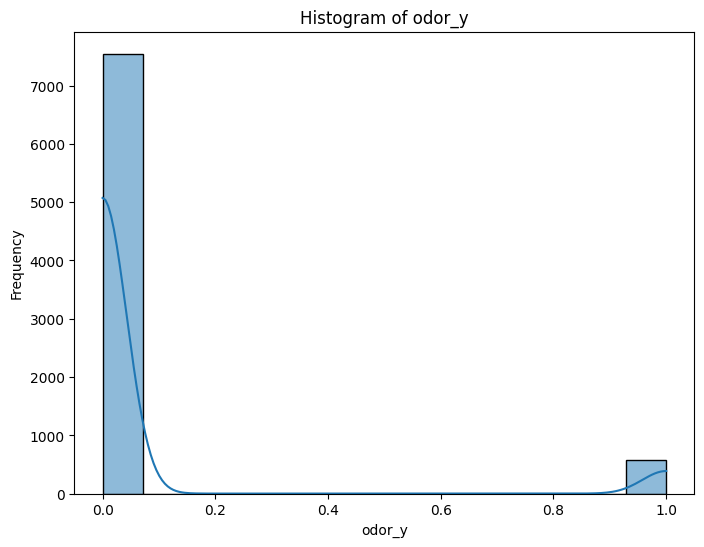

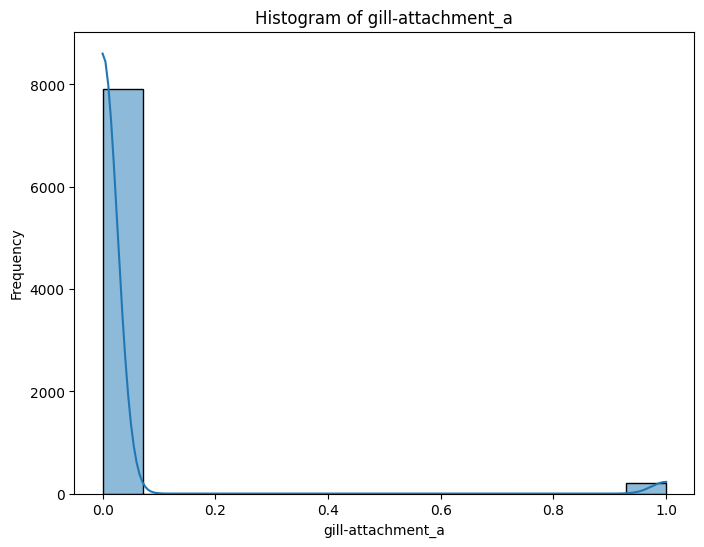

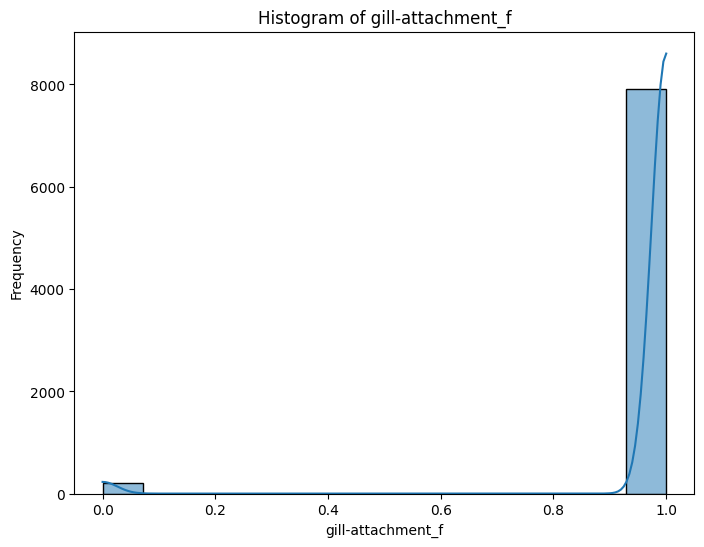

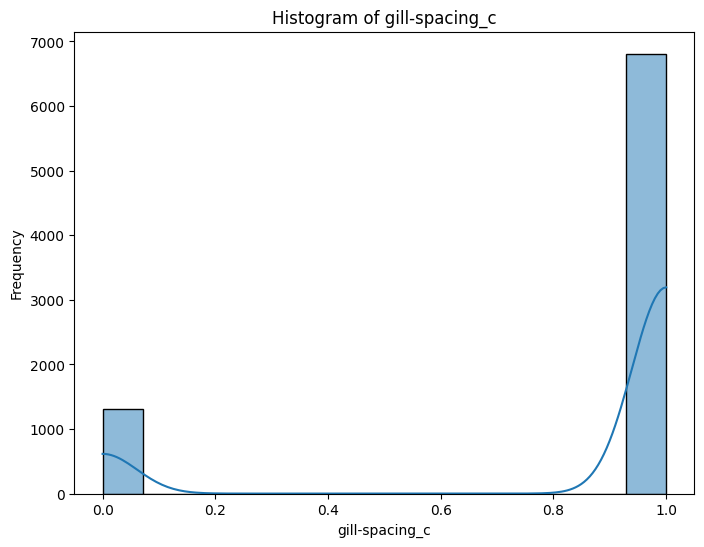

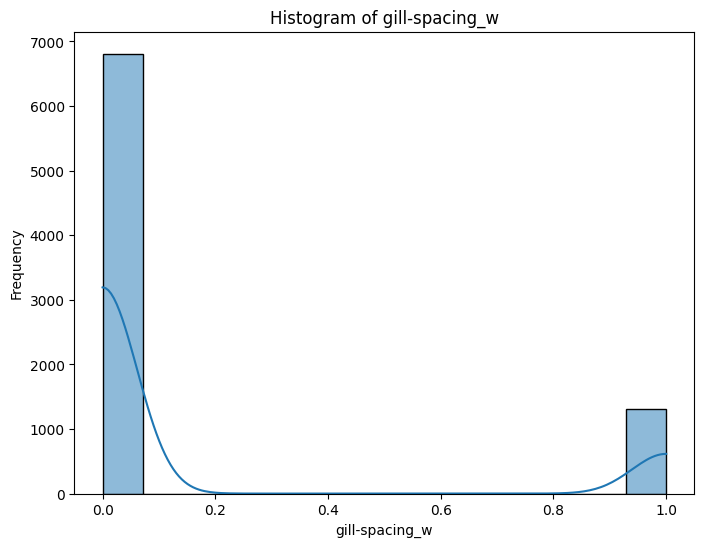

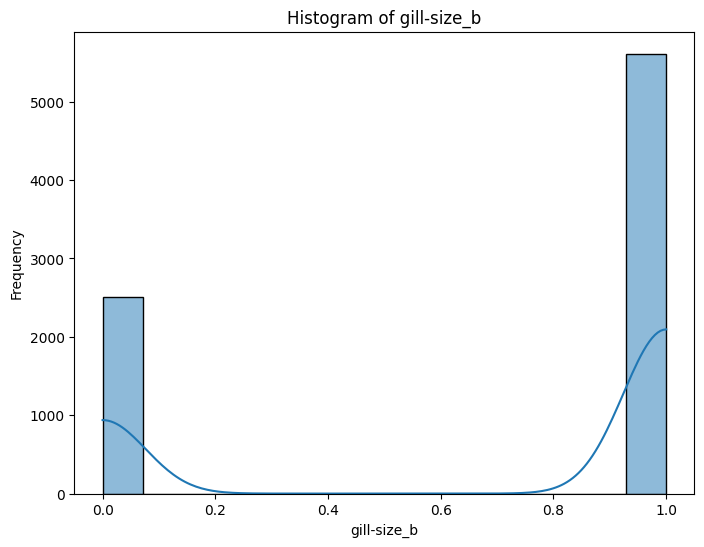

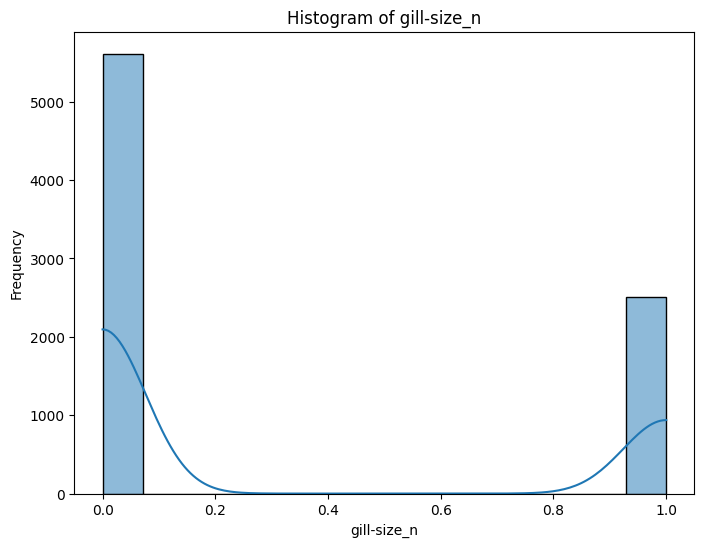

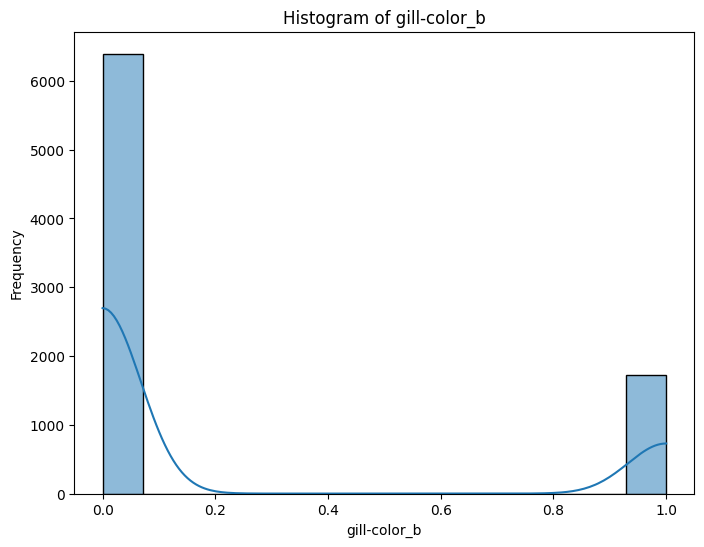

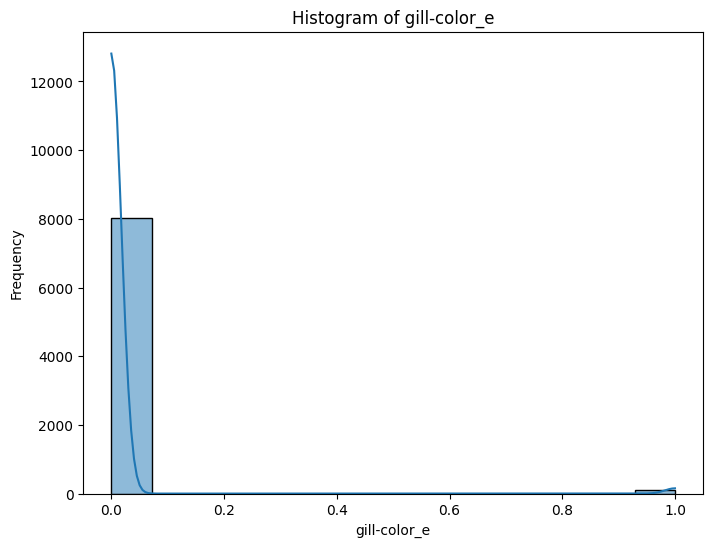

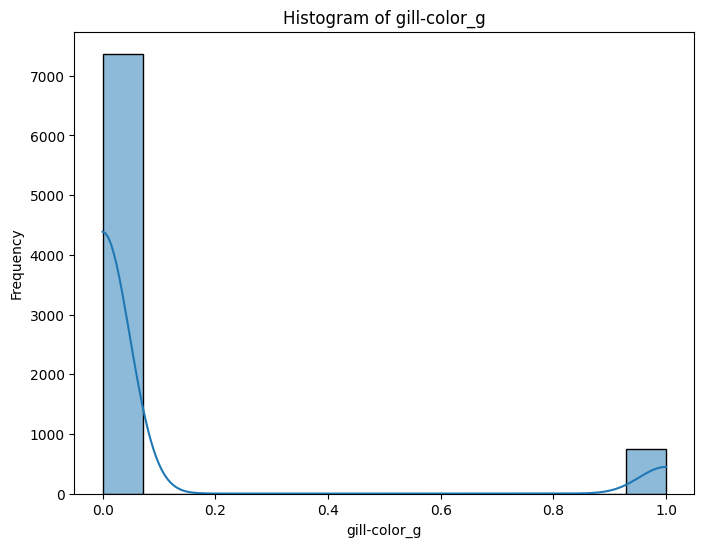

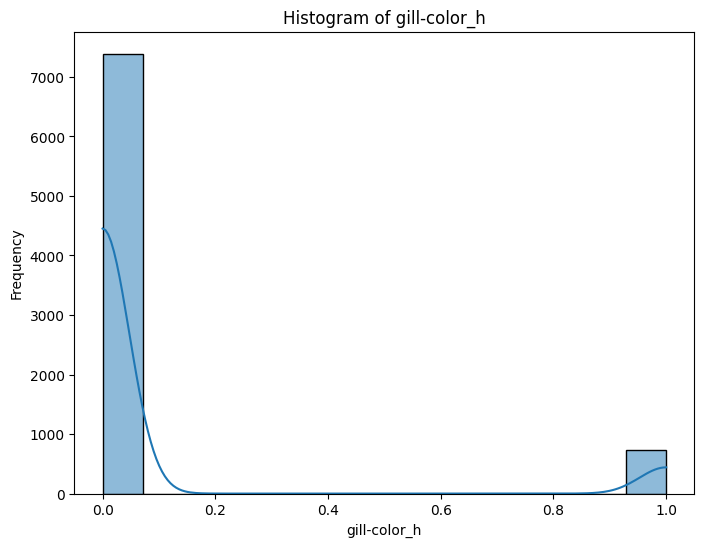

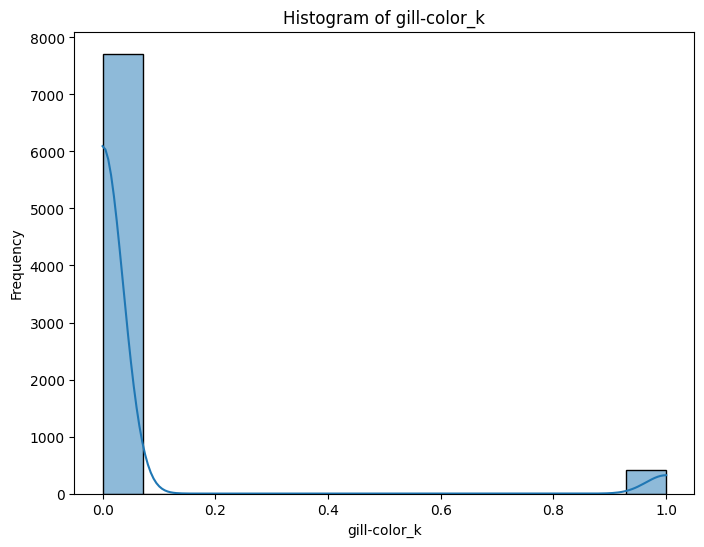

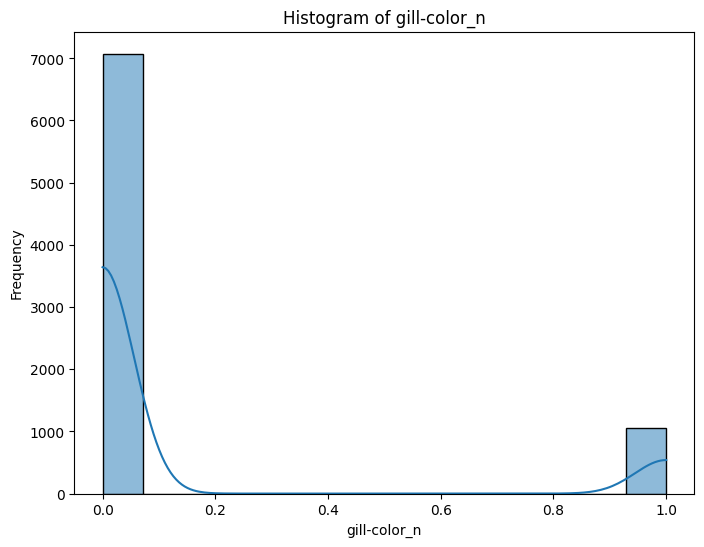

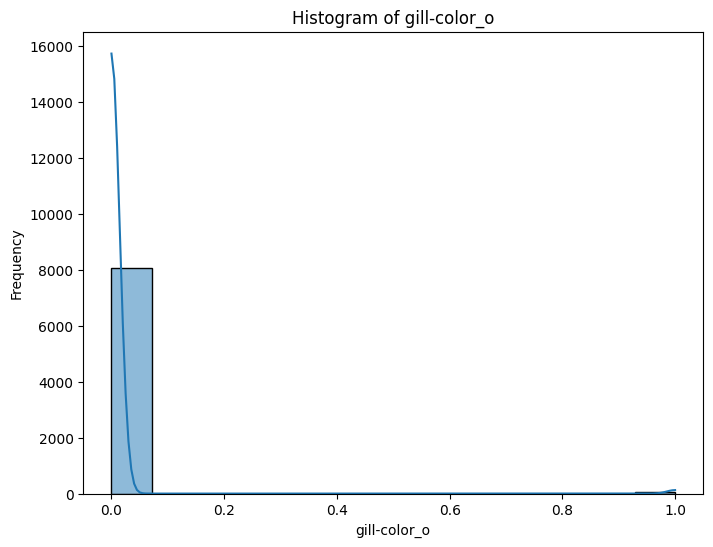

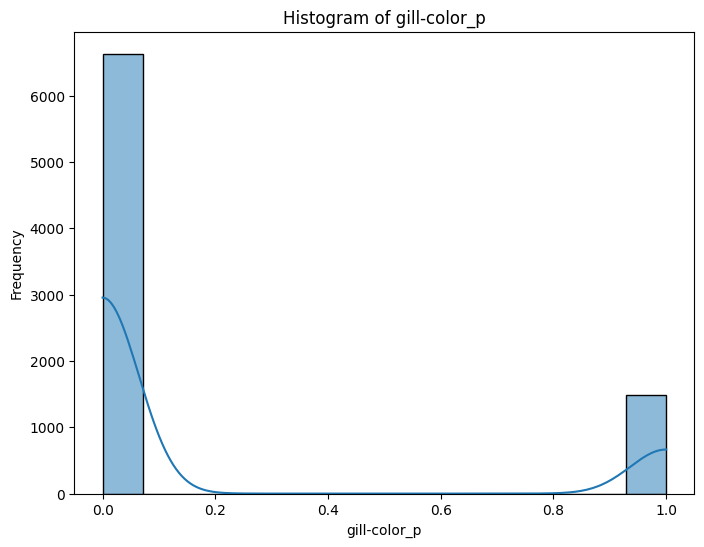

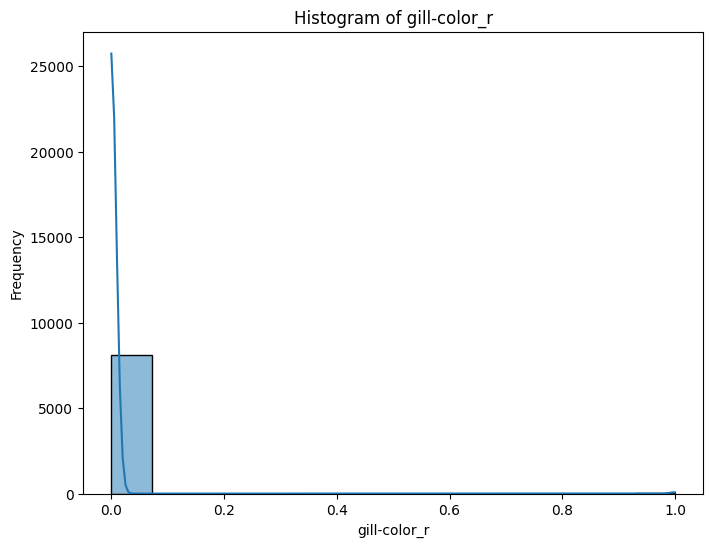

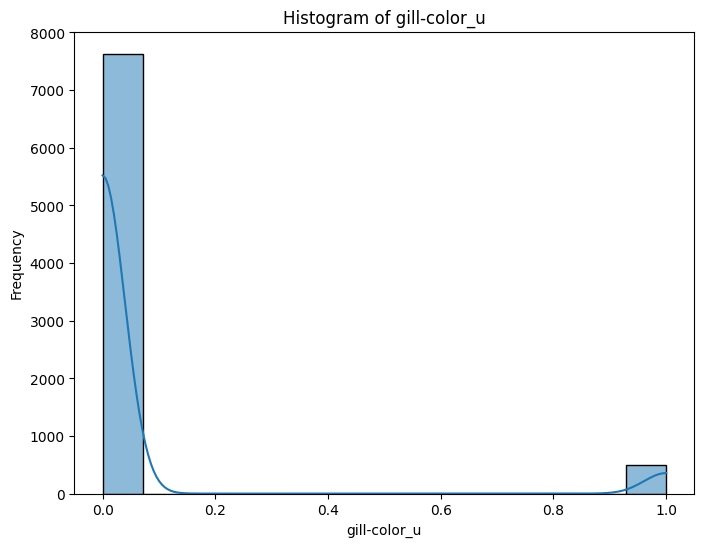

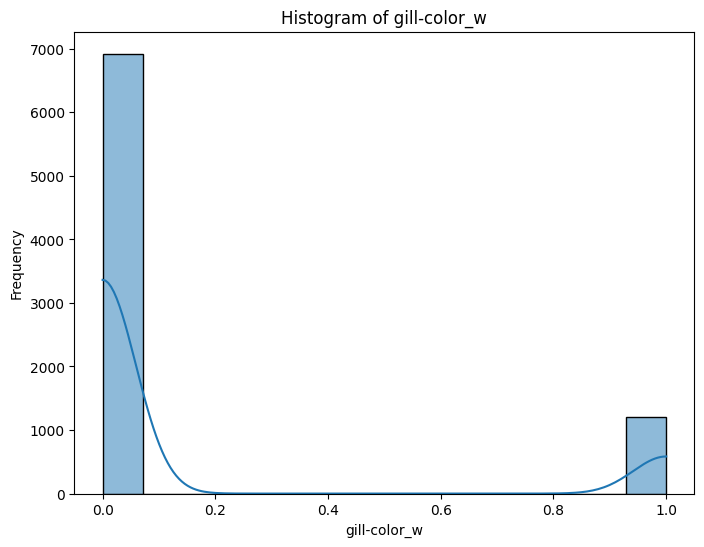

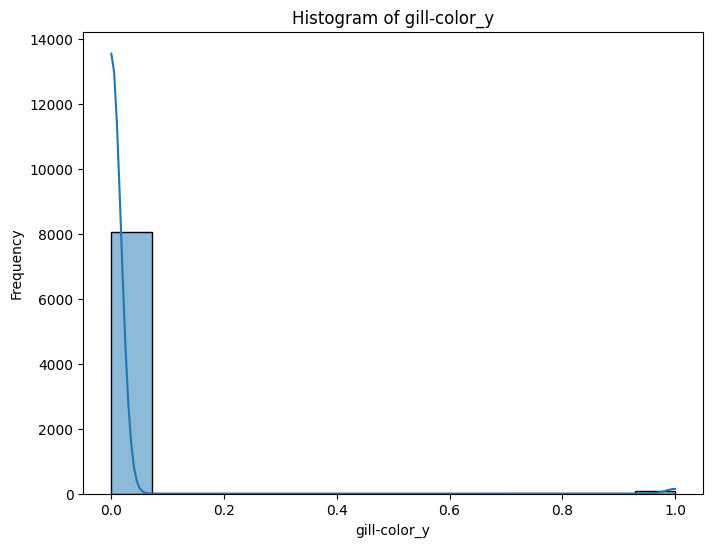

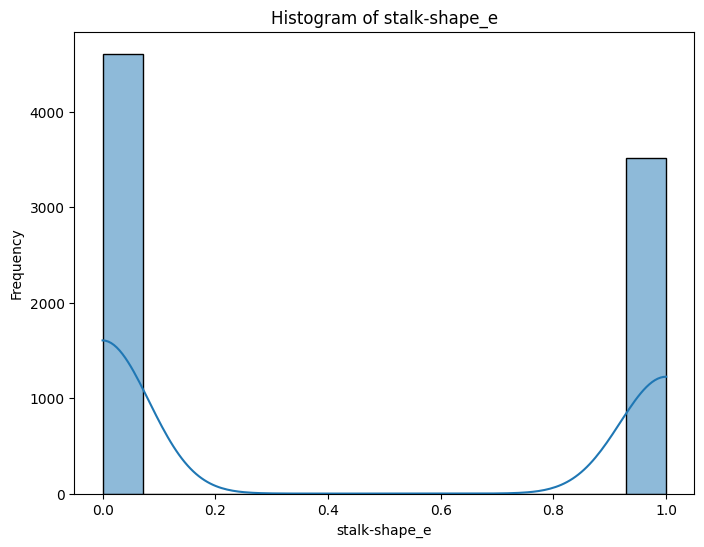

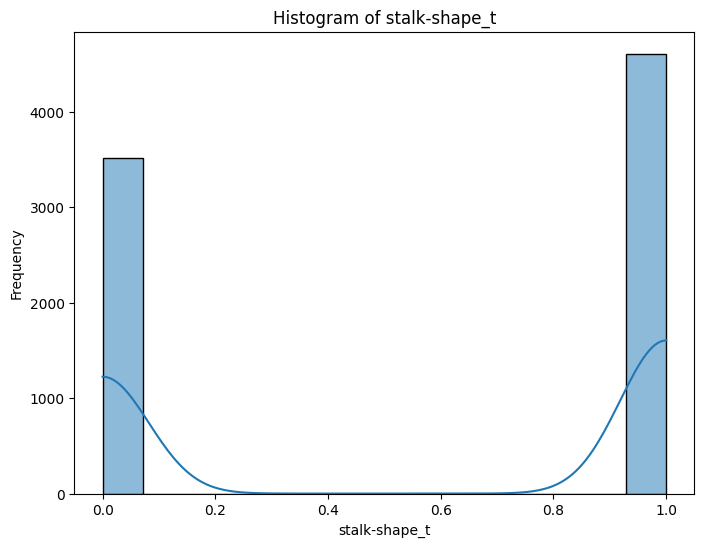

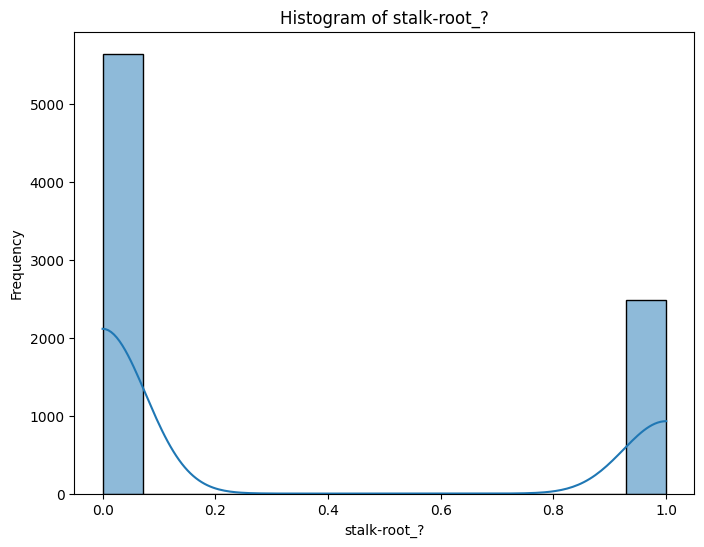

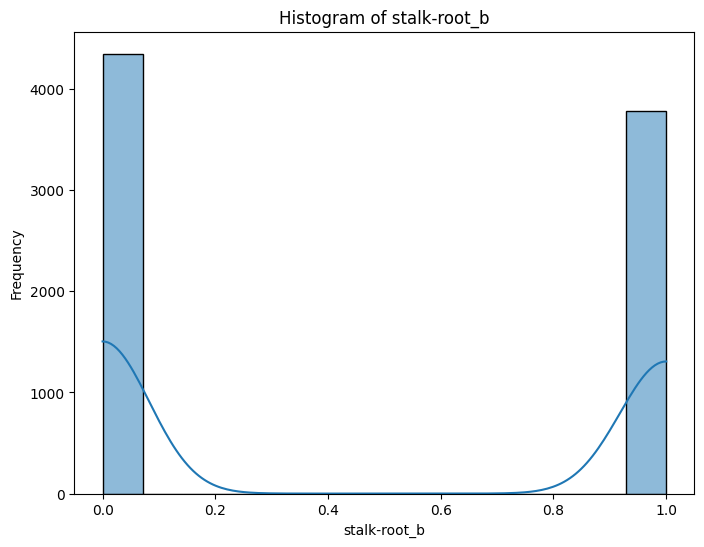

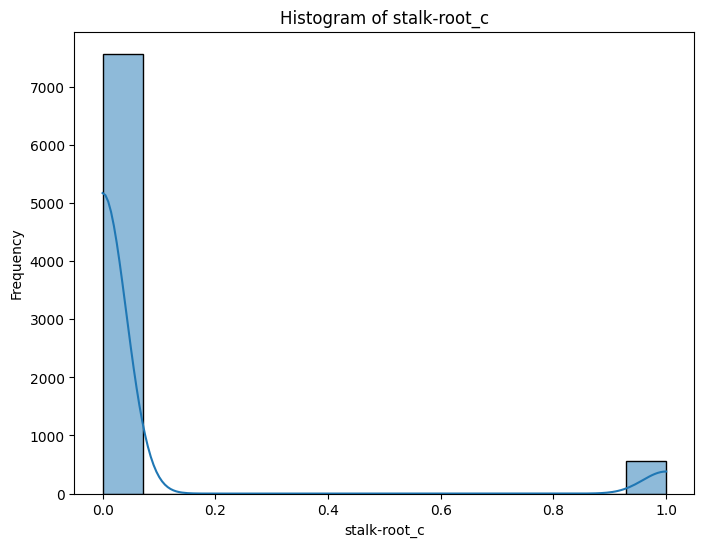

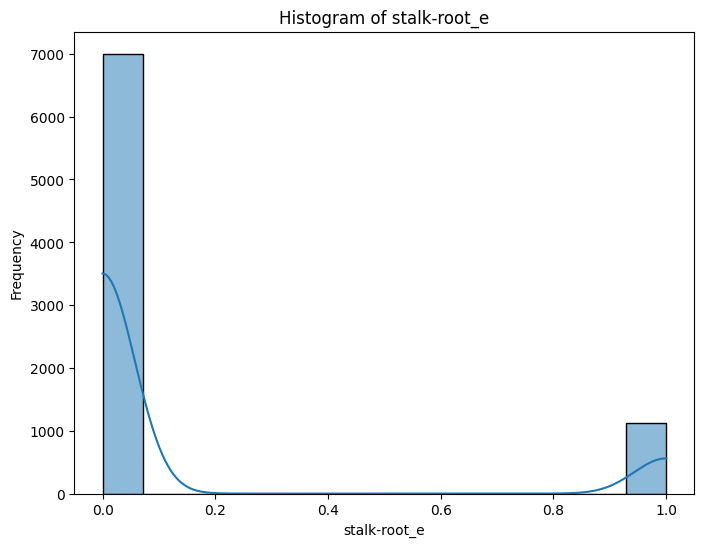

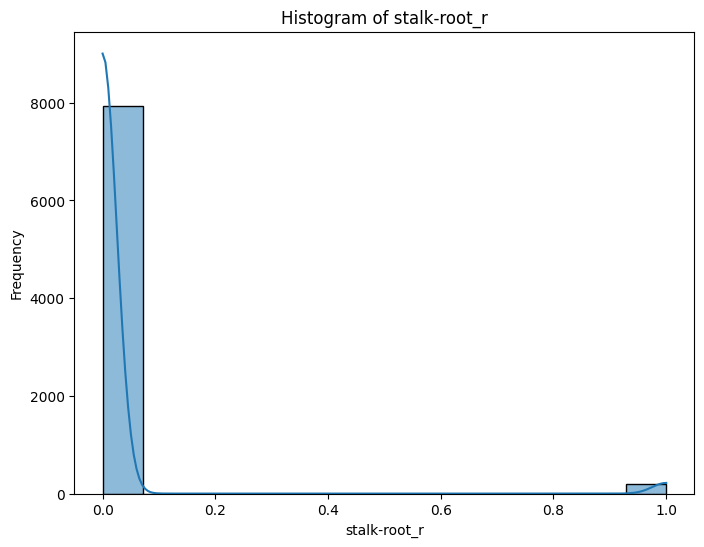

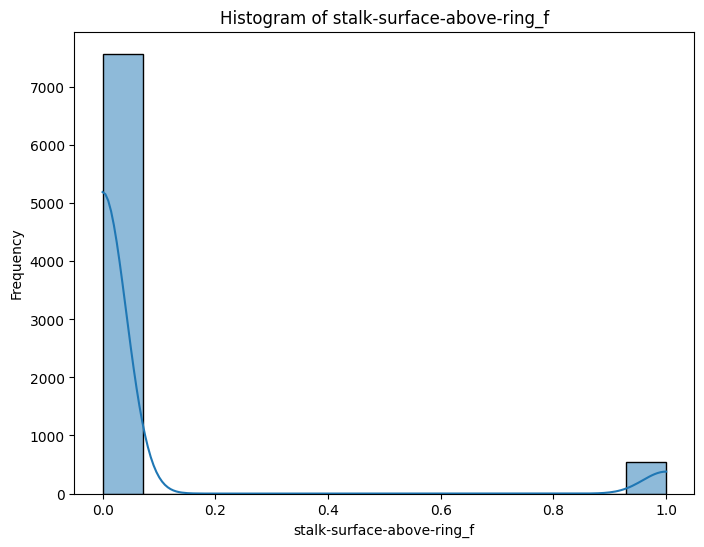

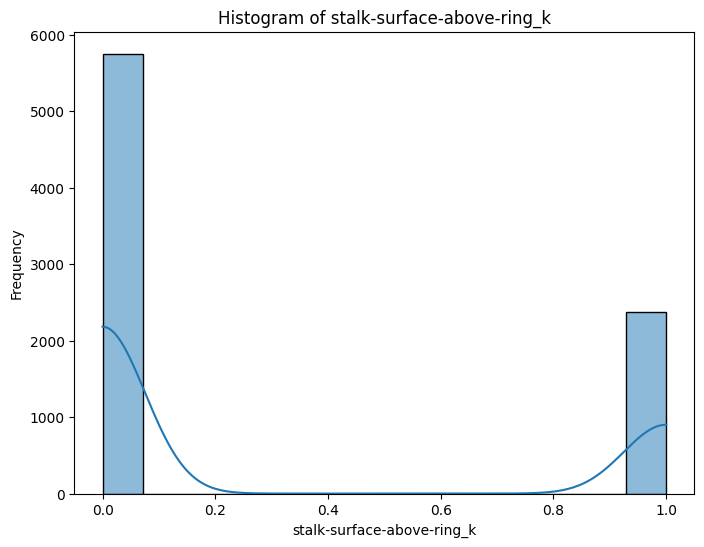

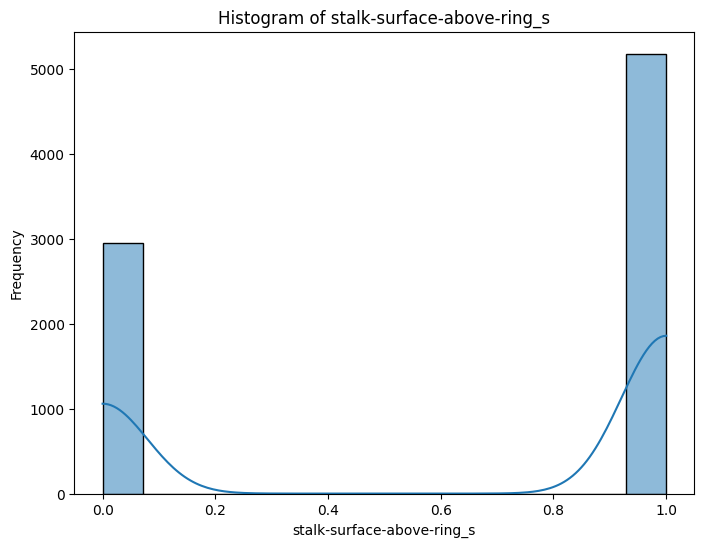

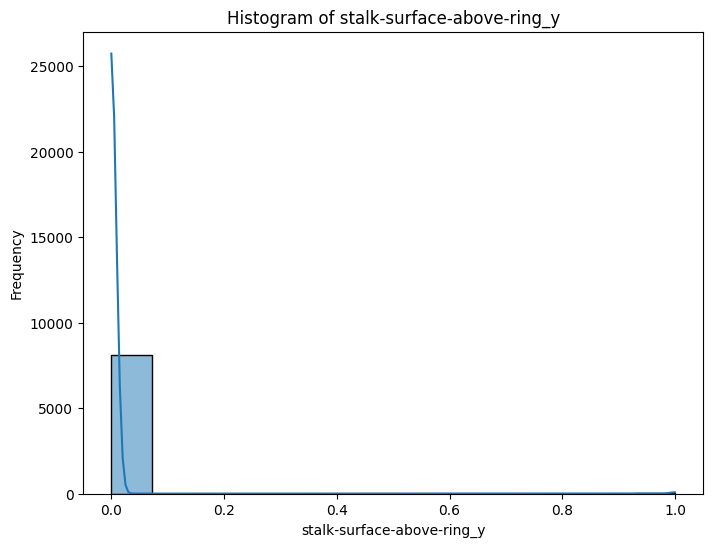

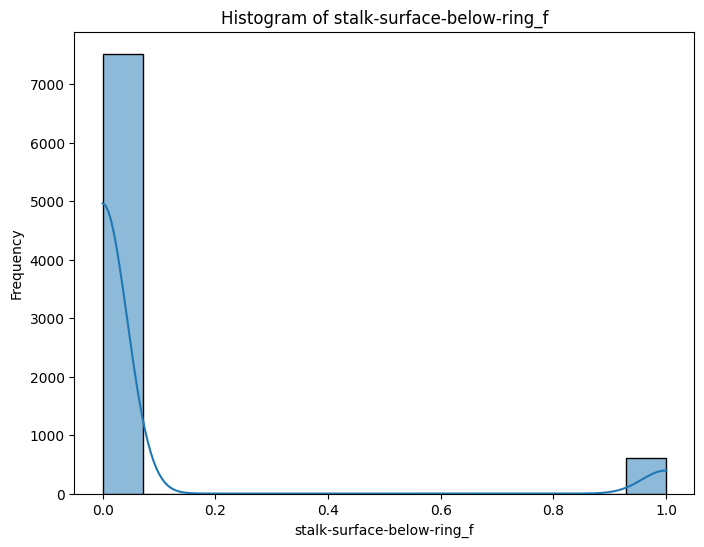

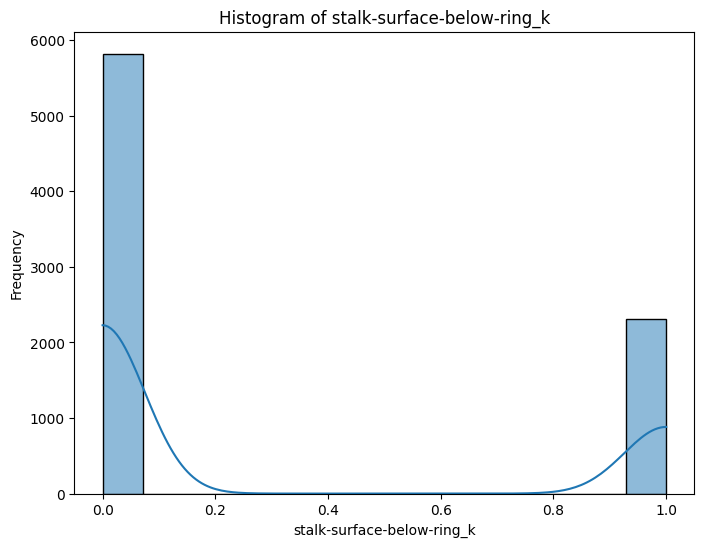

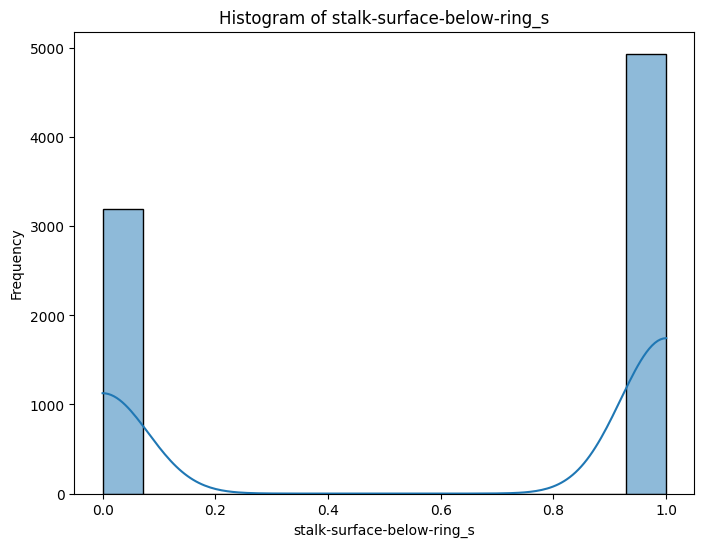

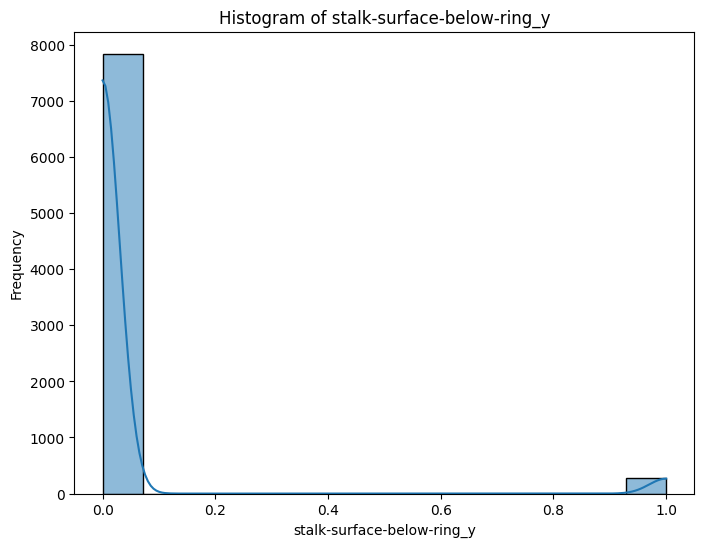

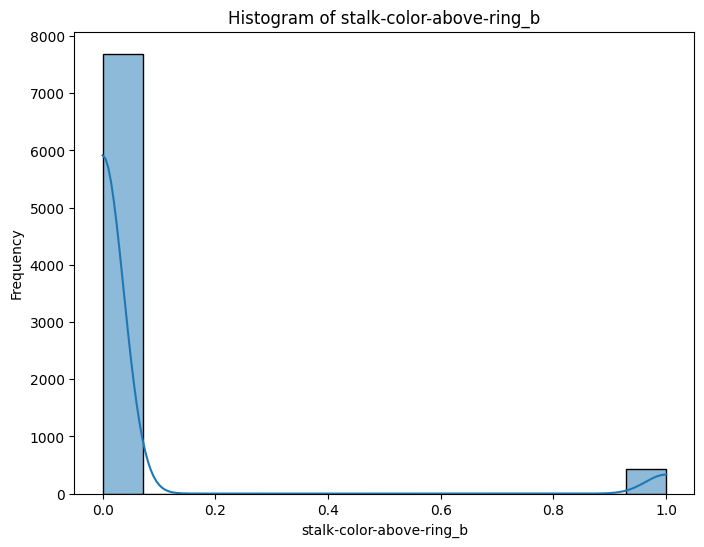

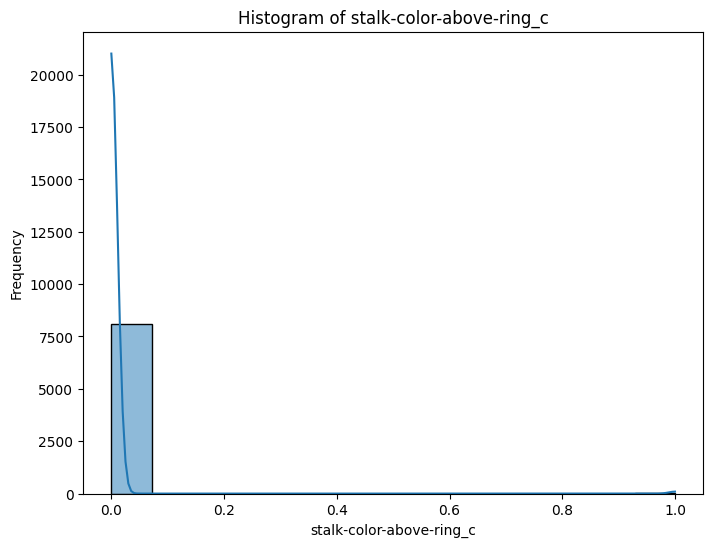

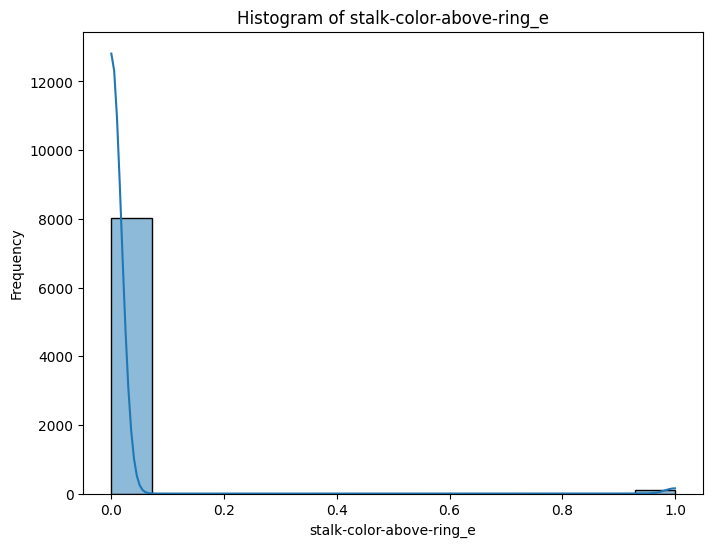

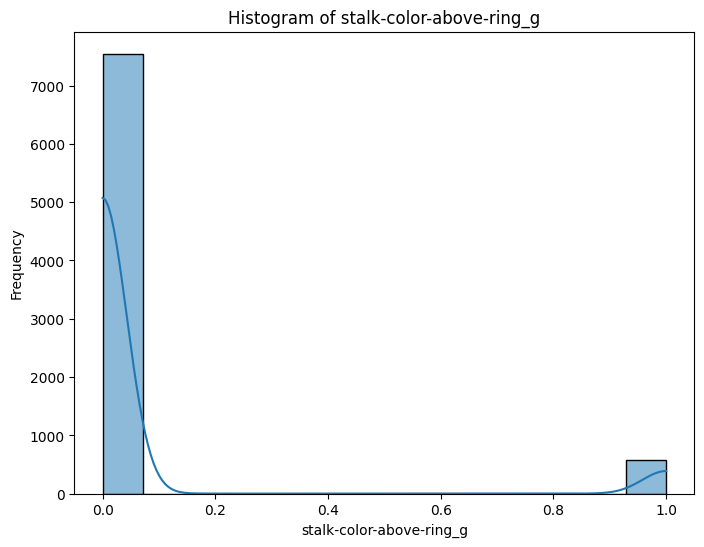

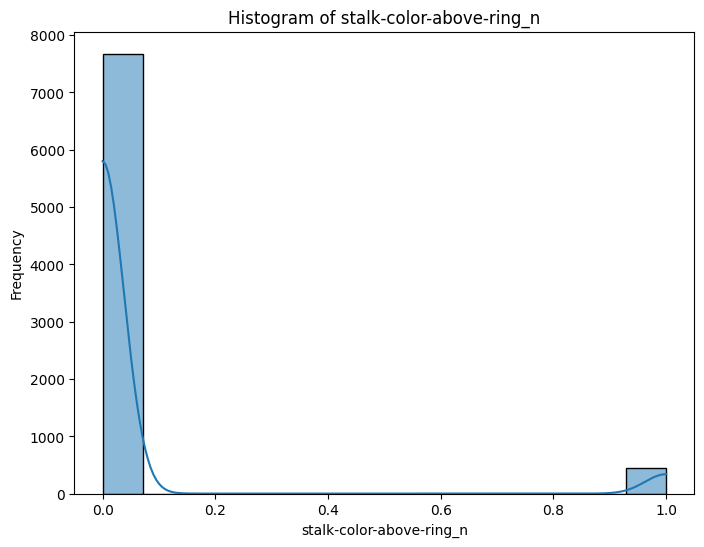

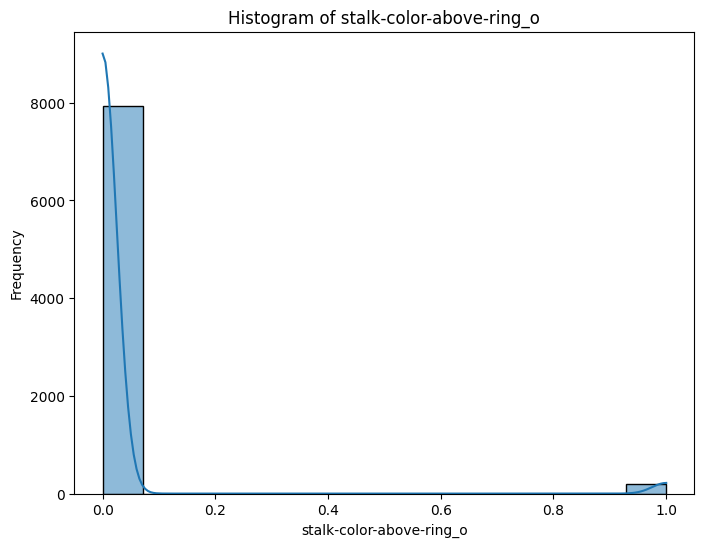

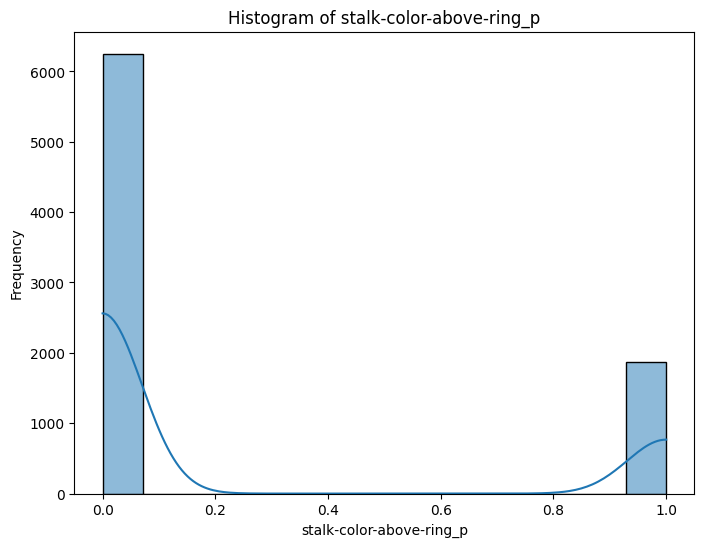

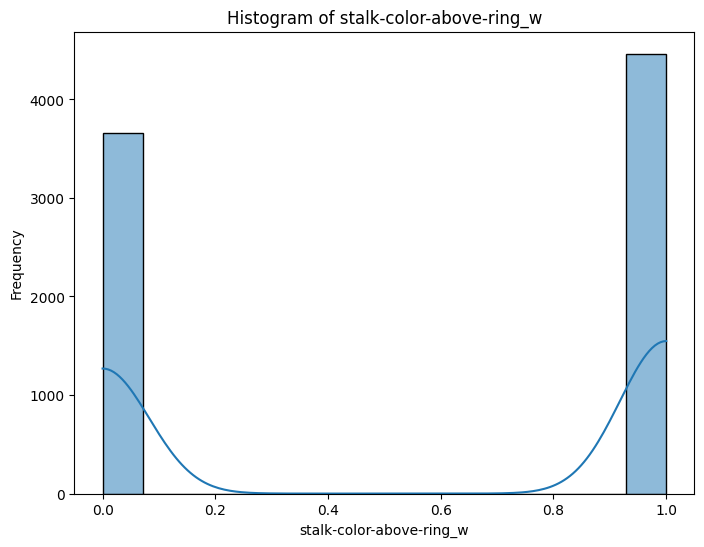

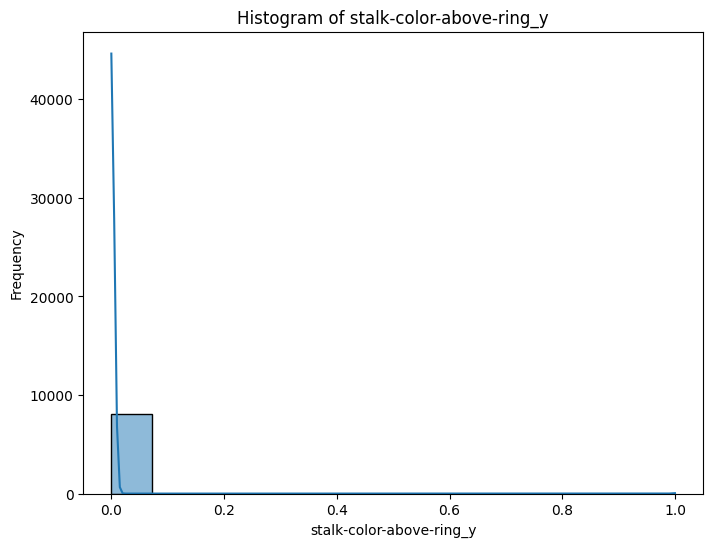

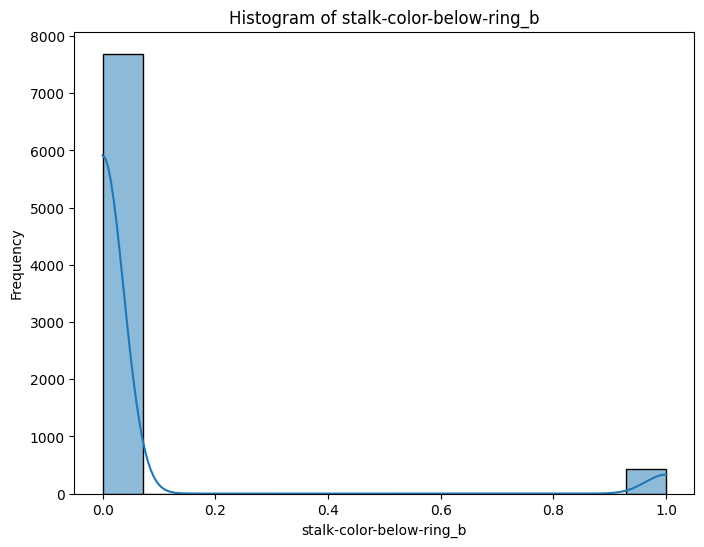

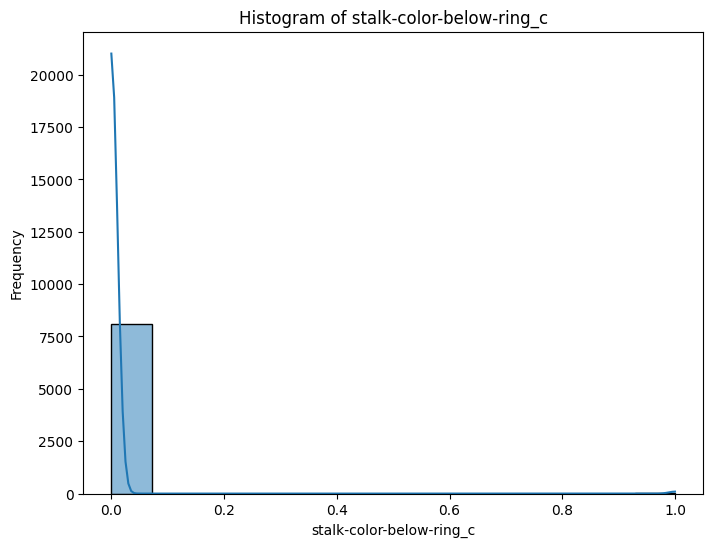

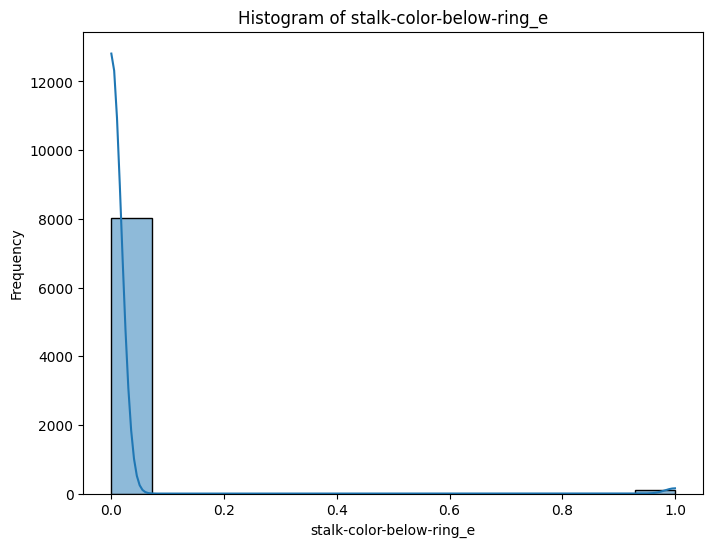

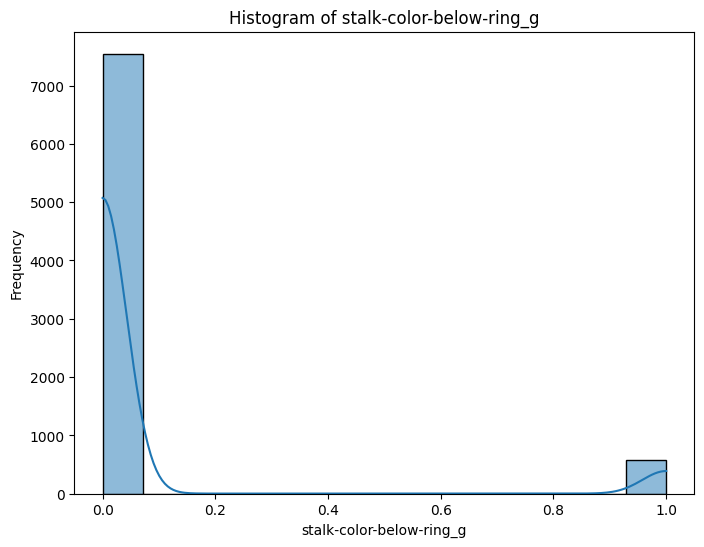

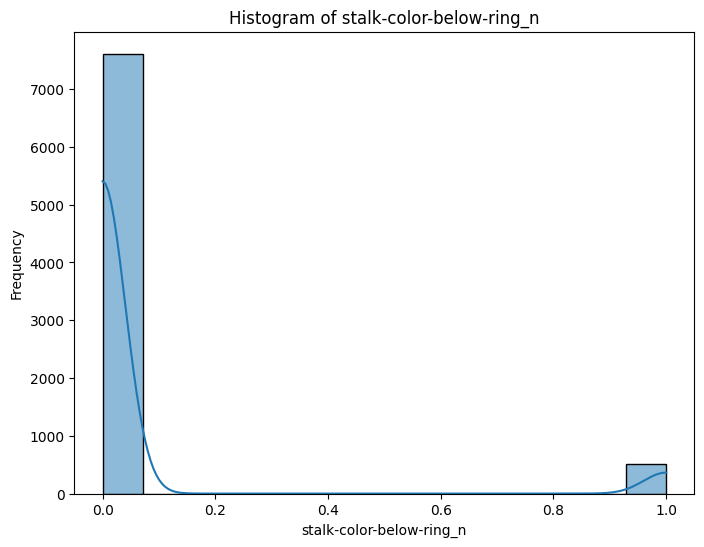

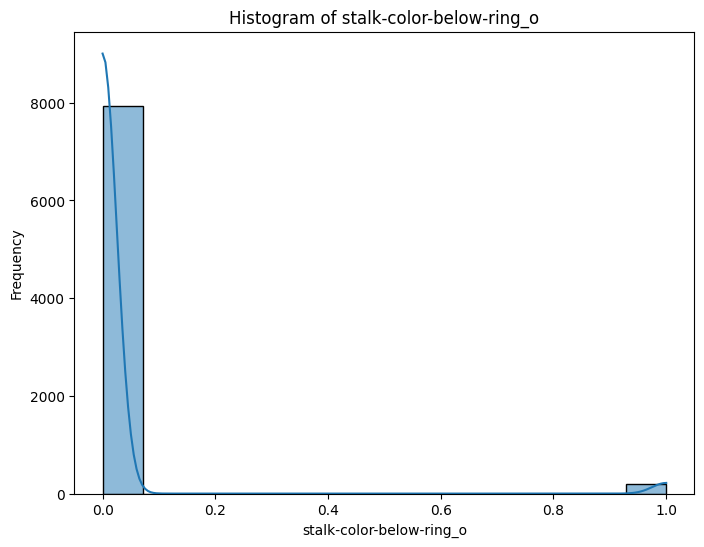

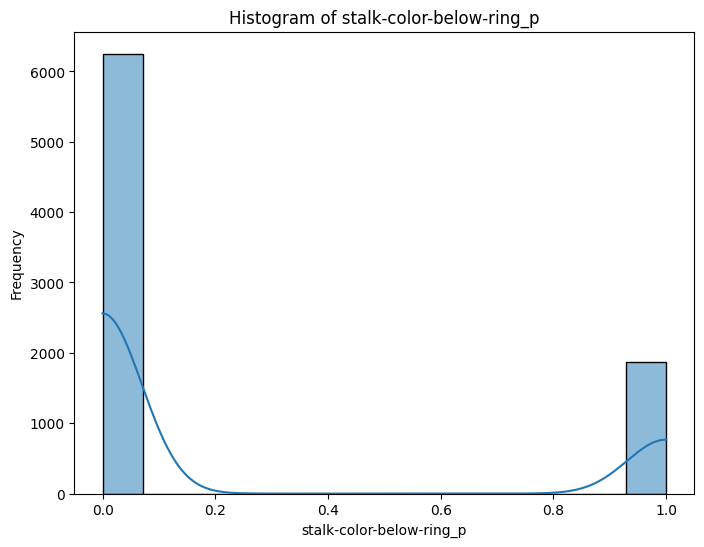

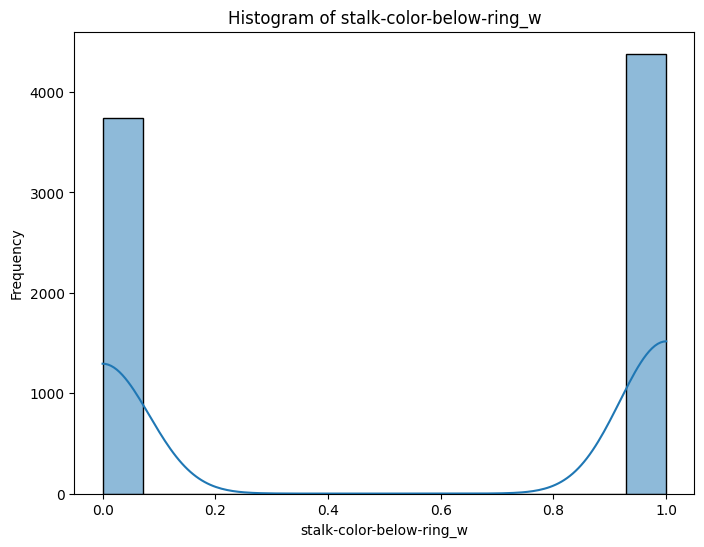

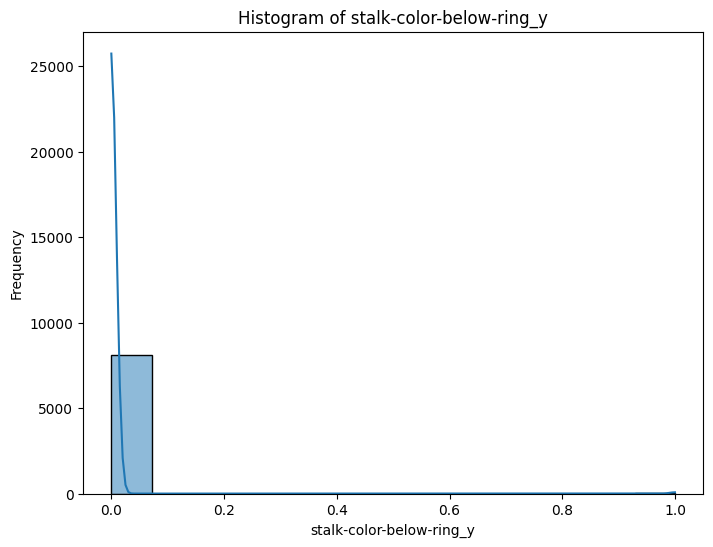

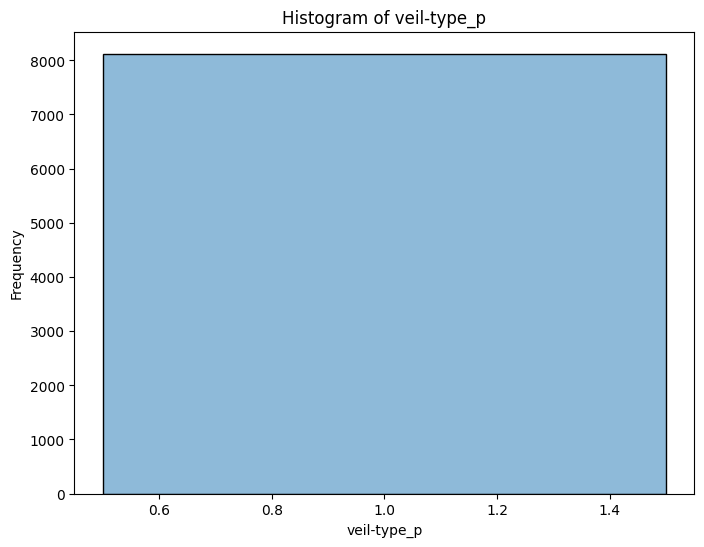

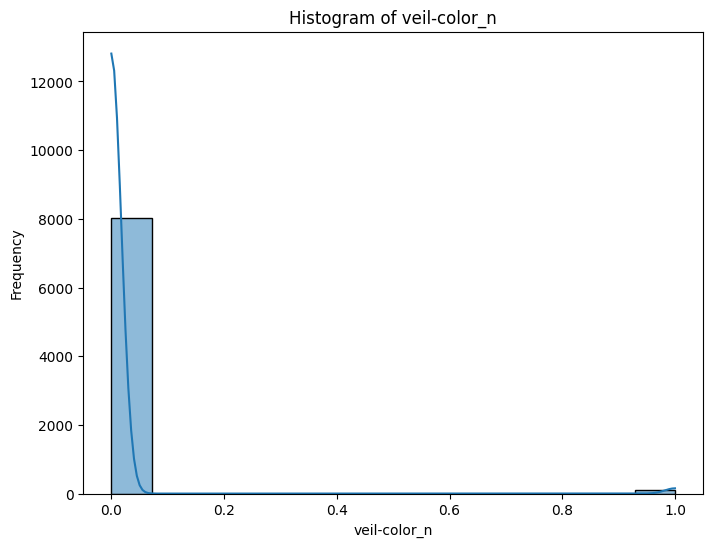

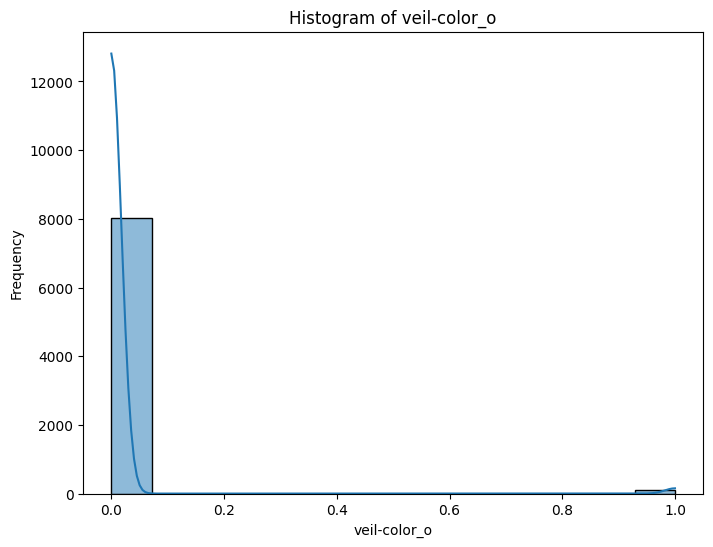

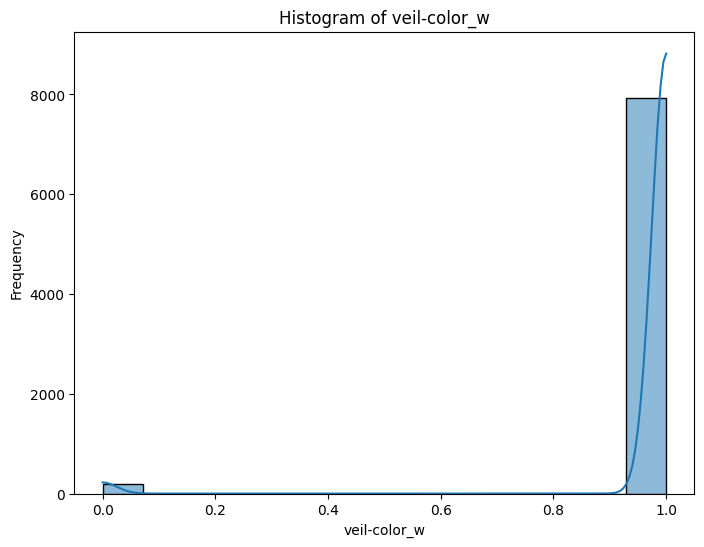

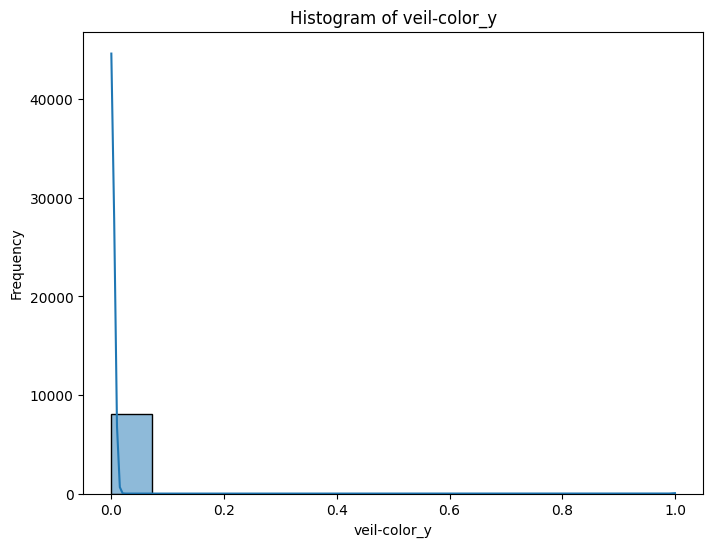

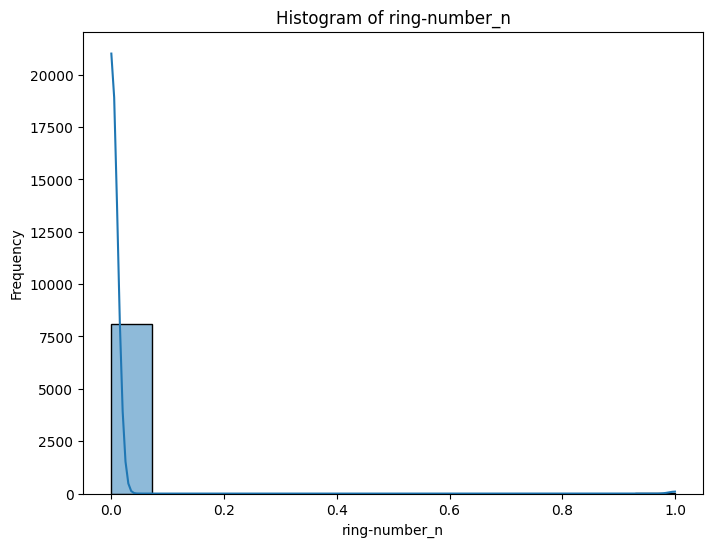

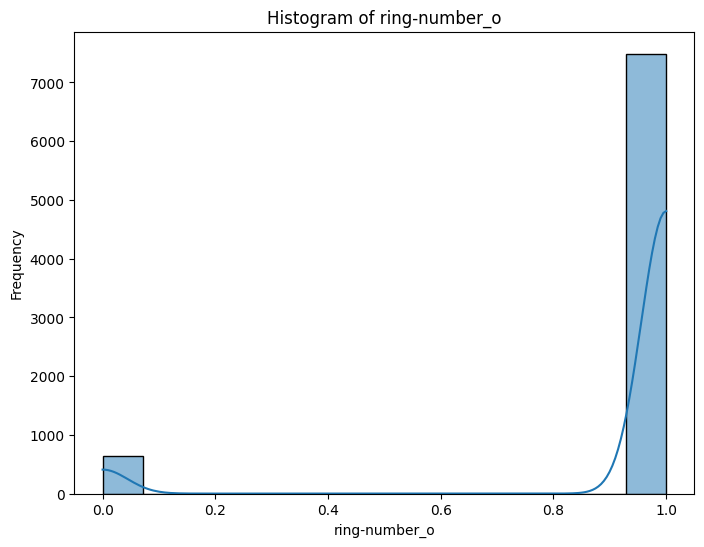

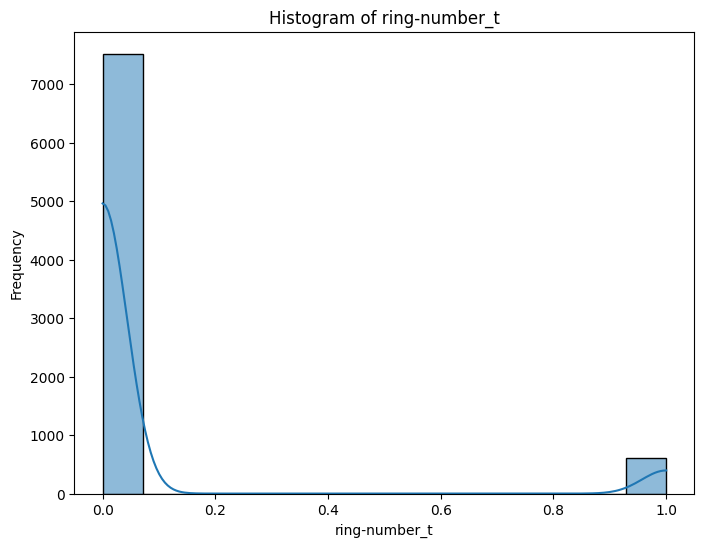

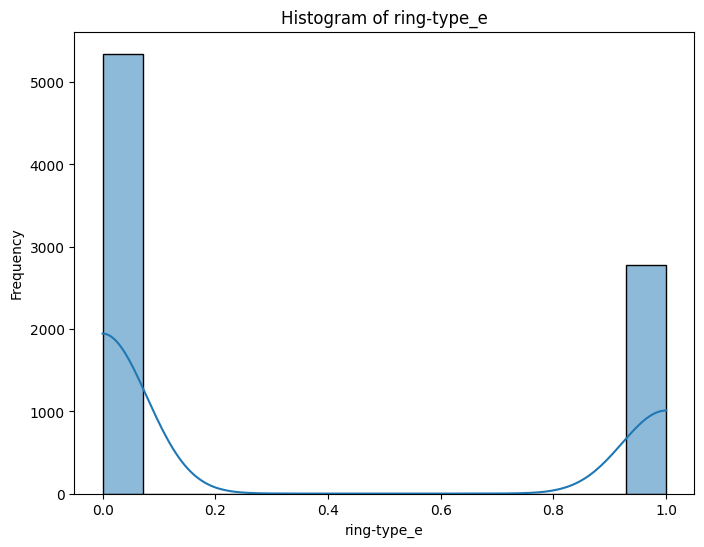

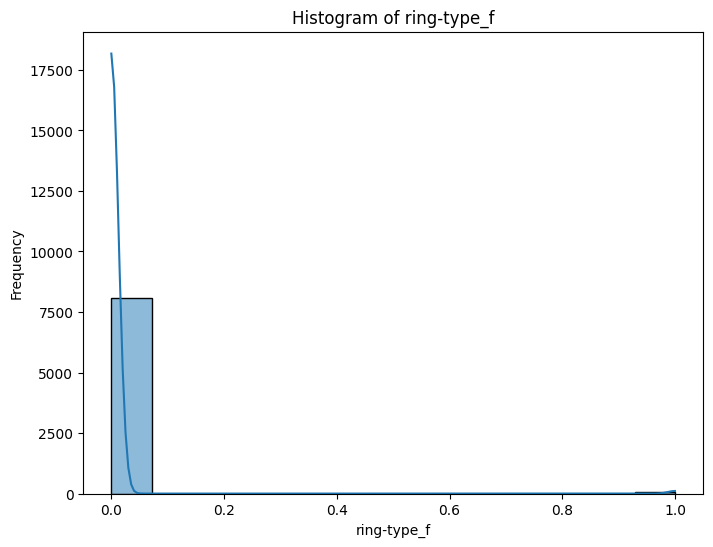

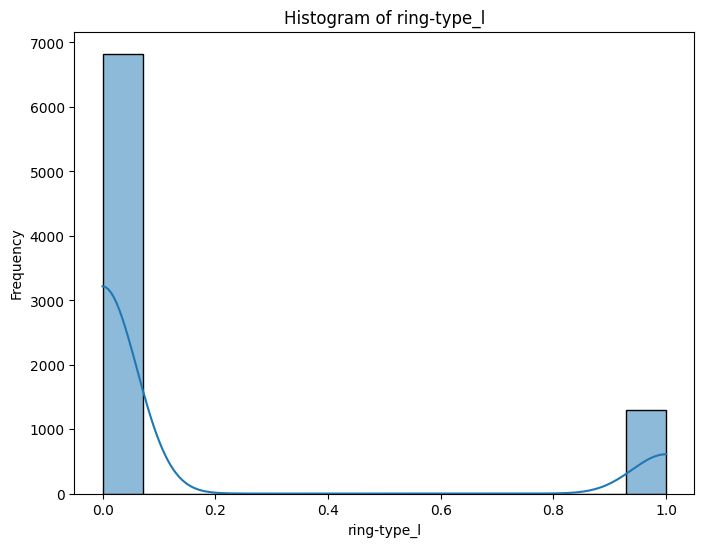

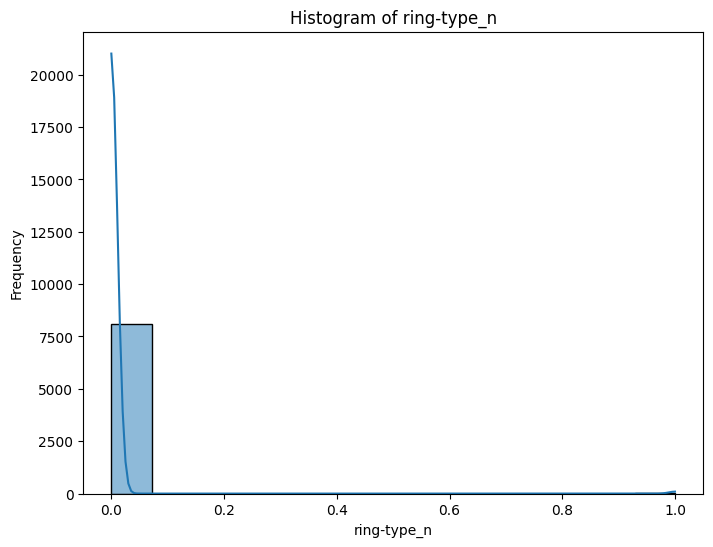

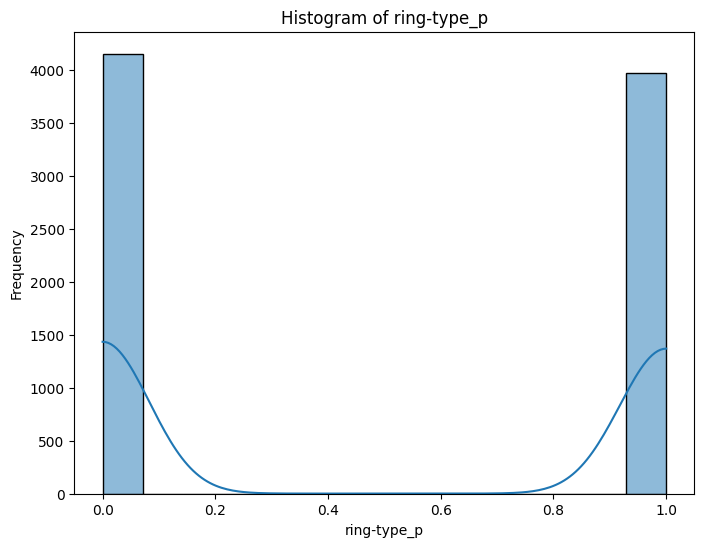

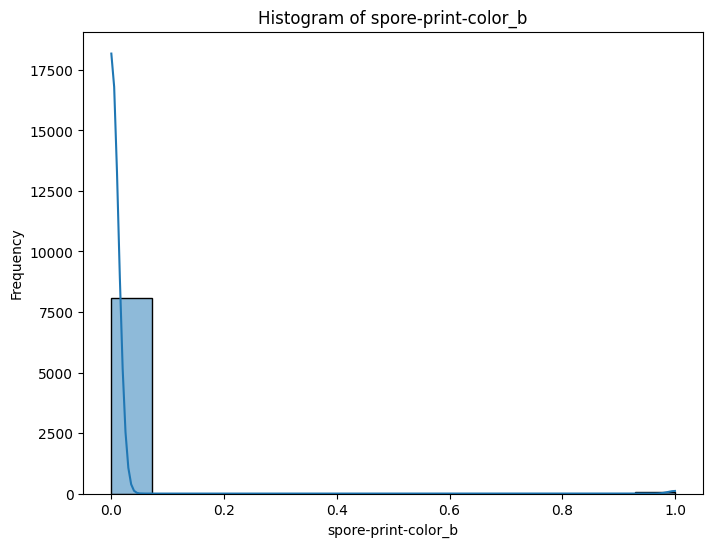

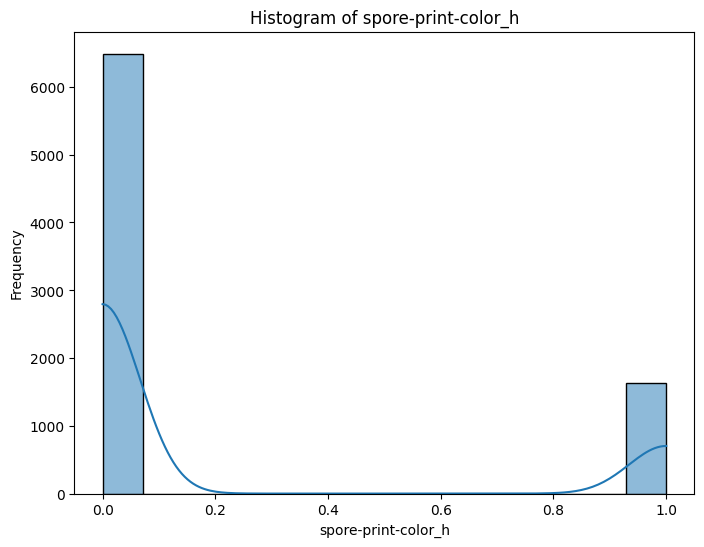

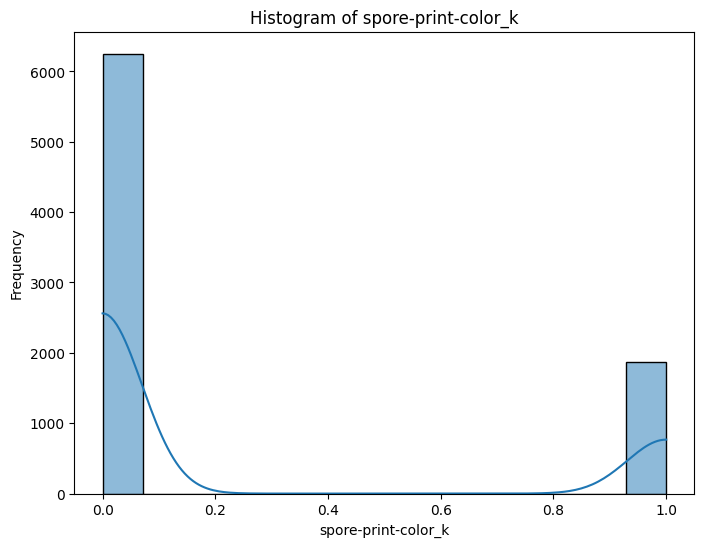

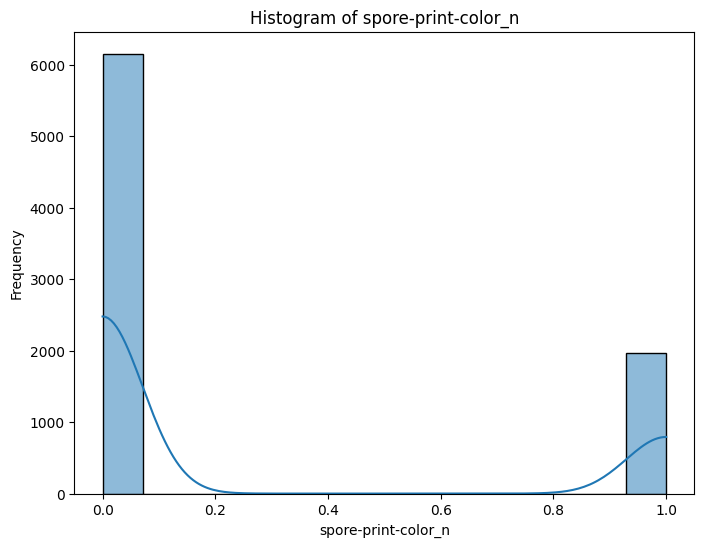

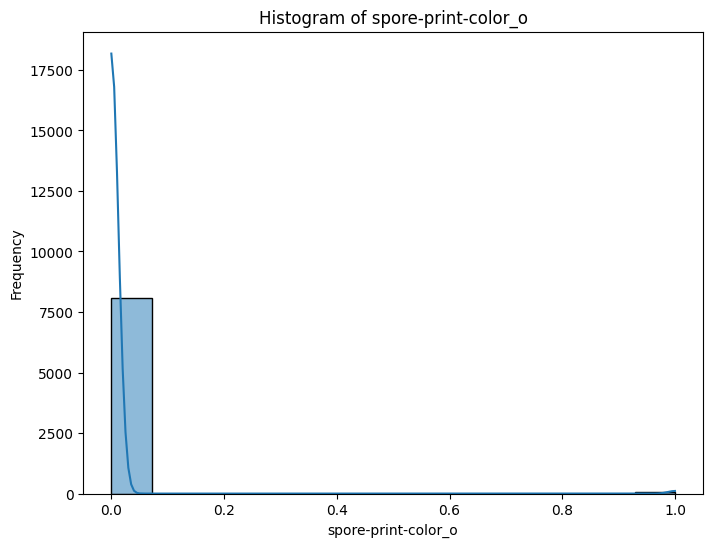

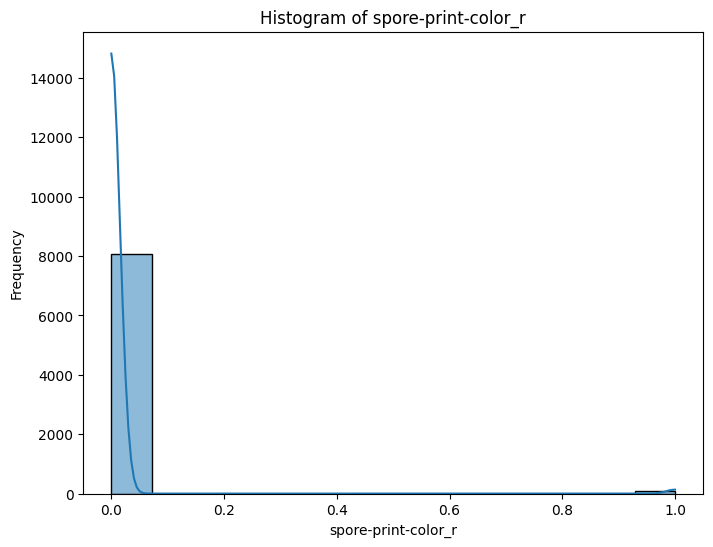

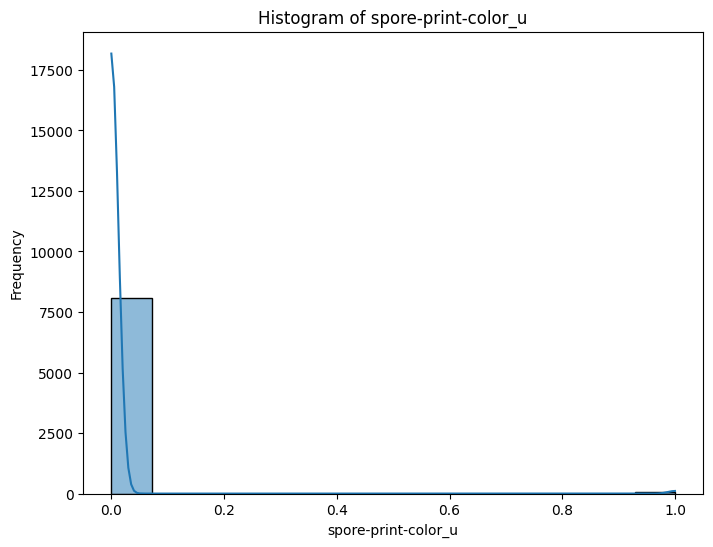

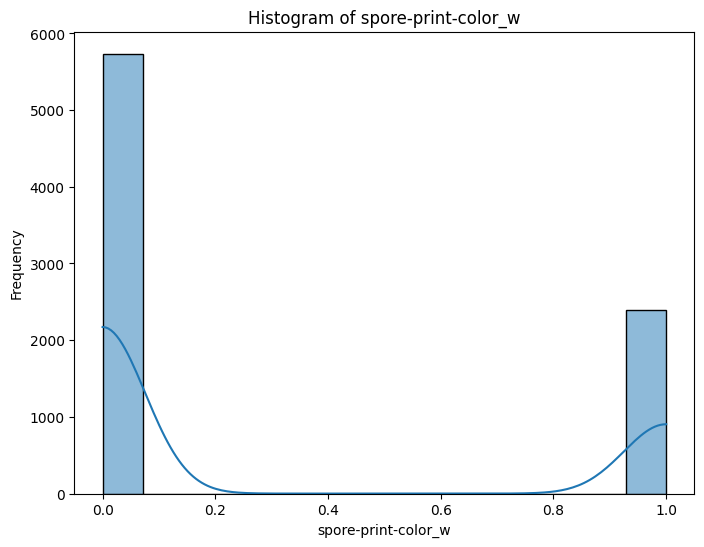

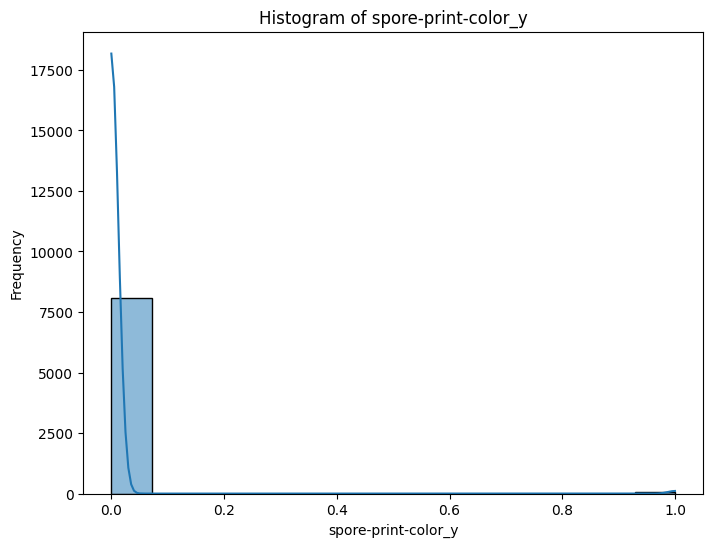

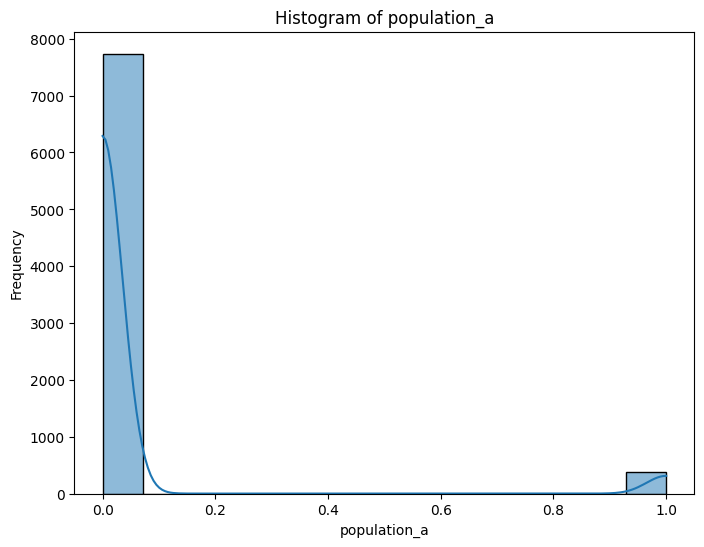

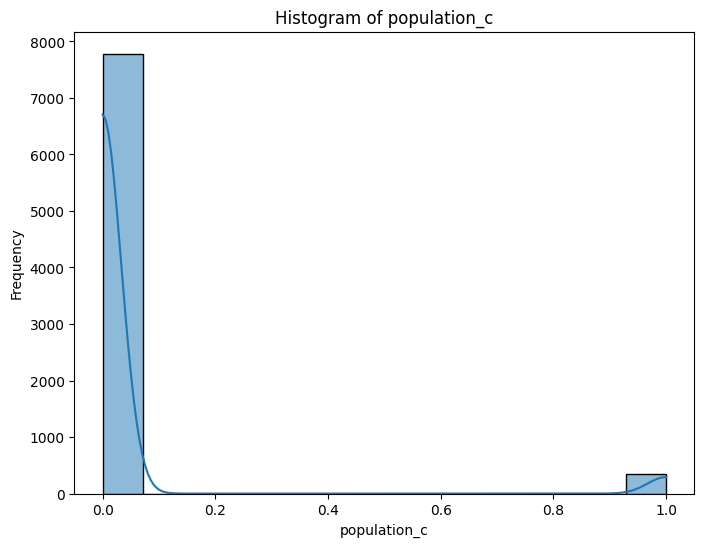

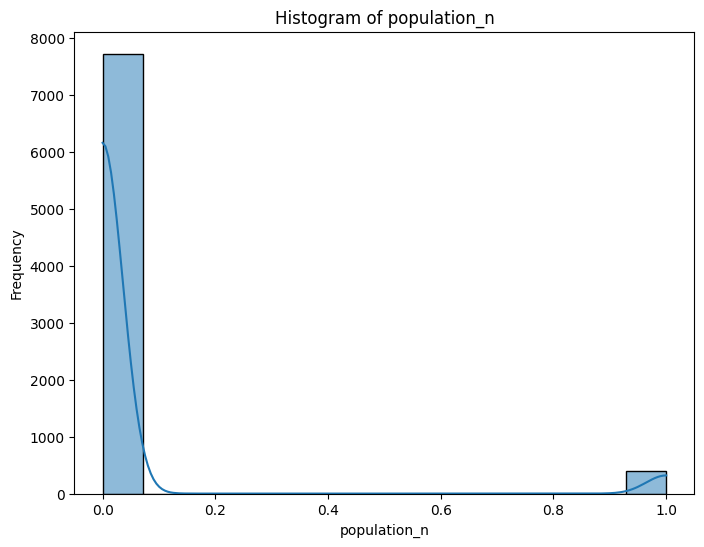

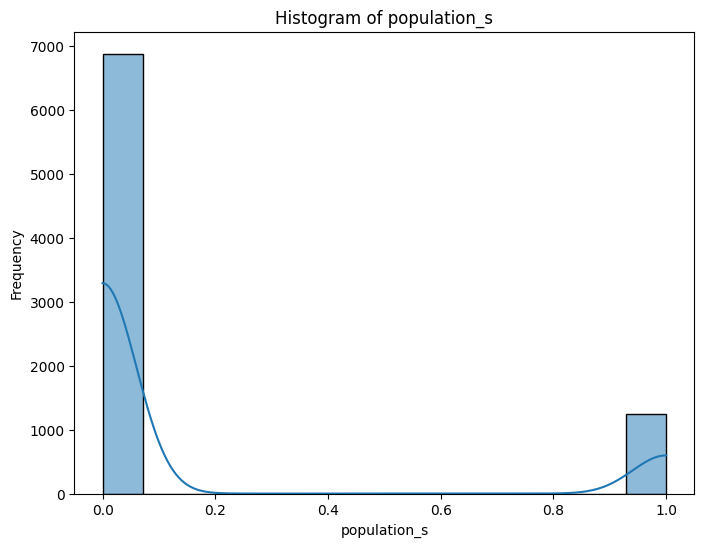

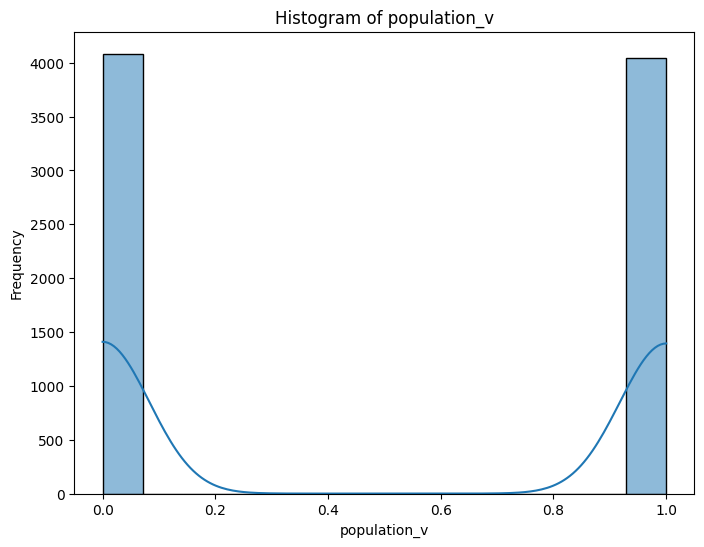

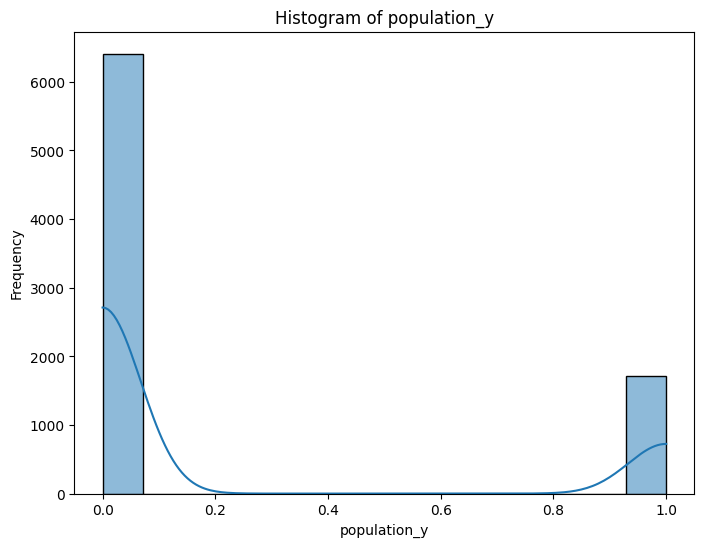

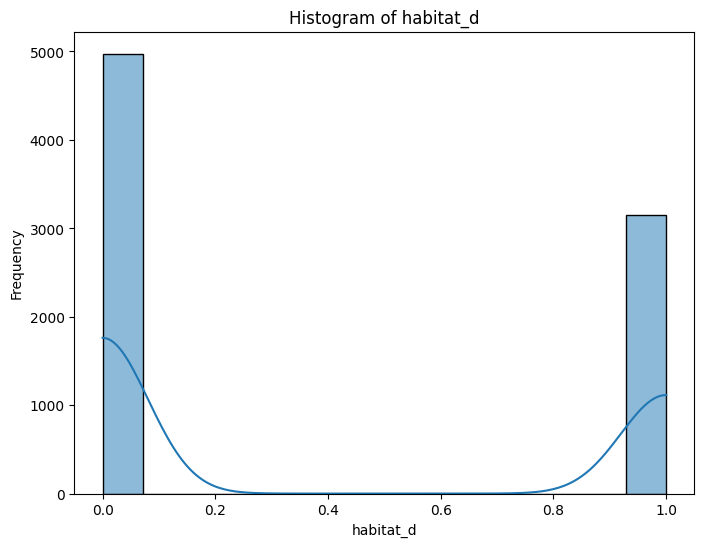

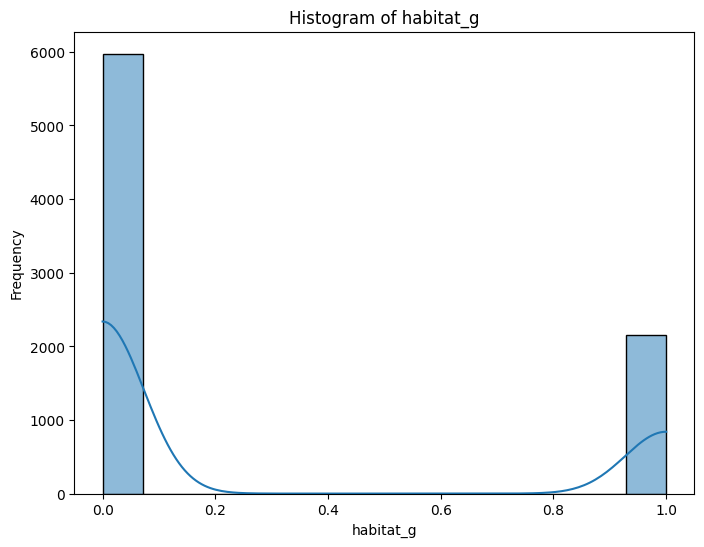

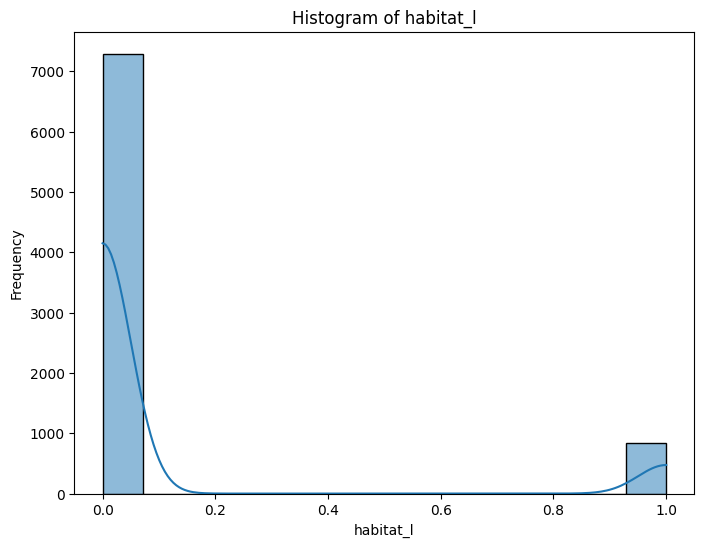

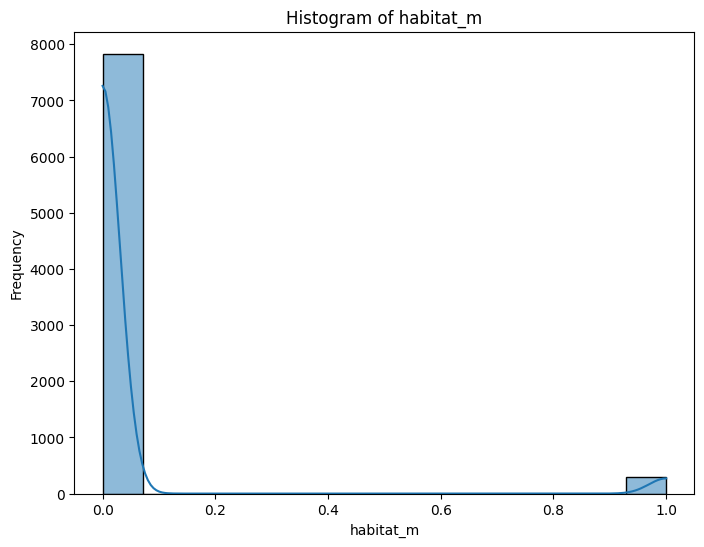

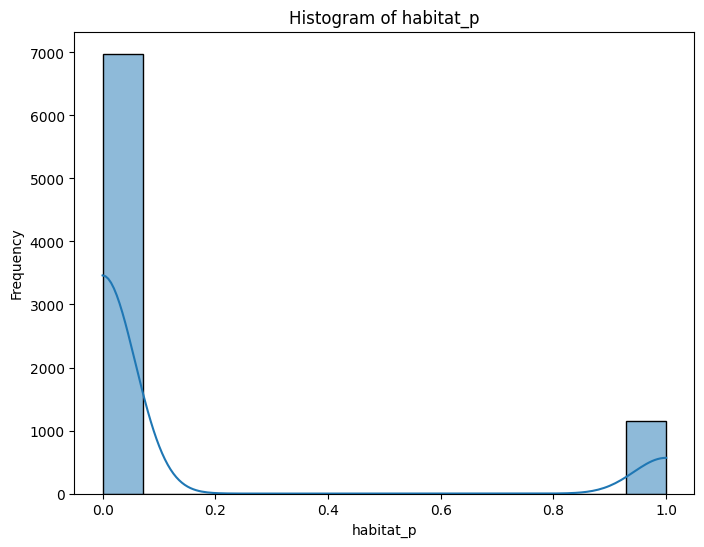

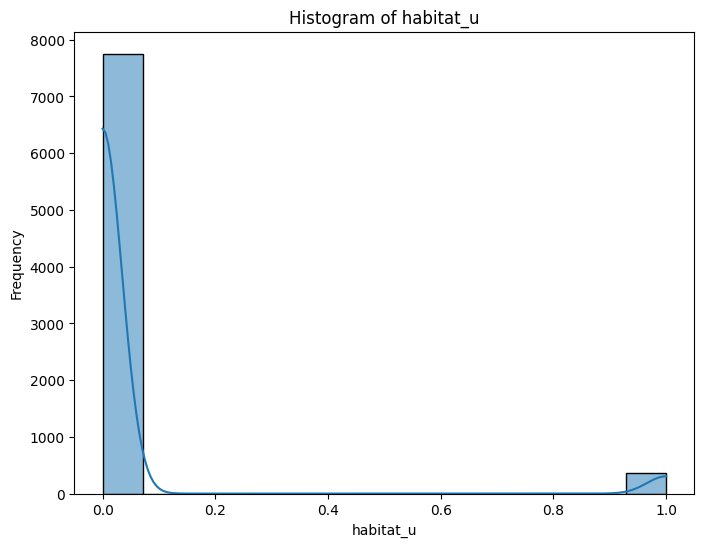

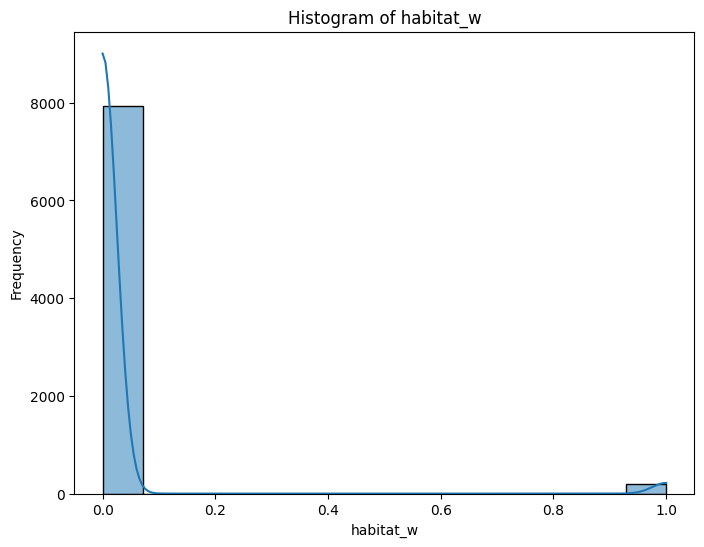

In [50]:
import seaborn as sns#still find using seaborn easier
import matplotlib.pyplot as plt

if 'class' in df_encoded.columns:#target variable
    features = df_encoded.drop('class', axis=1).columns
else:
    features = df_encoded.columns

# Plot histograms per feature
for feature in features:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df_encoded, x=feature, kde=True)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()


In [ ]:
#right hand skew

Data manipulation:

1. **Handling Missing Values**: Missing values were addressed through imputation or removal.
2. **Encoding Categorical Variables**: Categorical variables were encoded numerically.
3. **Train-Test Split**: The dataset was divided into training and testing sets.
4. **Normalization/Standardization**: Features were scaled as needed for modeling.
5. **Feature Engineering**: Additional features were created or modified.
6. **Data Visualization**: Exploratory data analysis was conducted to understand the data distribution and relationships between variables.

In [15]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['class'])
#target variable

#s;it data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('scaler', RobustScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

#define preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

#create a pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', xgb.XGBClassifier())])

#train the model
pipeline.fit(X_train, y_train)

#predict test set
y_pred = pipeline.predict(X_test)

#calc accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 1.0


Accuracy: 1.0
F1 Score: 1.0
AUC Score: 1.0


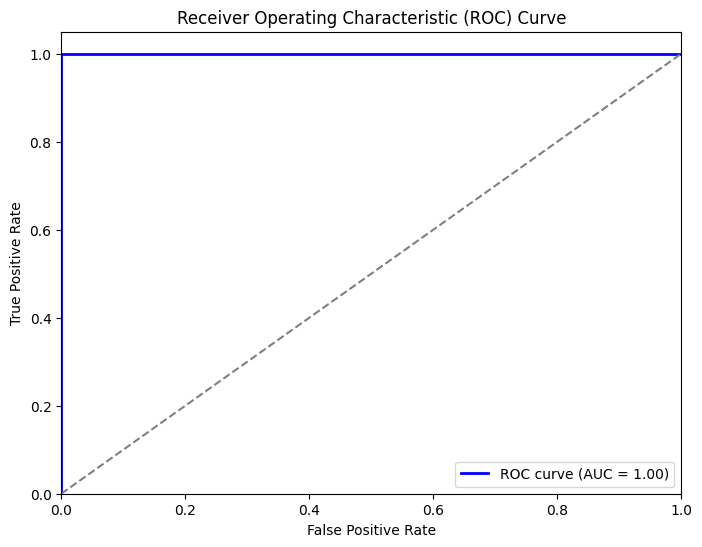

In [18]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

y_pred = pipeline.predict(X_test)

#accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

#f1
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

#AUC score
auc = roc_auc_score(y_test, pipeline.predict_proba(X_test)[:, 1])
print("AUC Score:", auc)

#calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, pipeline.predict_proba(X_test)[:, 1])

#plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [ ]:
#KNN model

In [22]:
from sklearn.preprocessing import OneHotEncoder

#one-hot encoding
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
X_train_encoded = encoder.fit_transform(X_train)
X_cv_encoded = encoder.transform(X_cv)

# Train
knn.fit(X_train_encoded, y_train)

y_cv_pred = knn.predict(X_cv_encoded)

accuracy_cv = accuracy_score(y_cv, y_cv_pred)
print("Cross-validation Accuracy:", accuracy_cv)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Cross-validation Accuracy: 1.0


In [35]:
import numpy as np

num_instances = X_train.shape[0]
sqrt_num_instances = np.sqrt(num_instances)

k = int(np.round(sqrt_num_instances))

print("Square root of the number of instances:", sqrt_num_instances)
print("Rounded value of k:", k)


Square root of the number of instances: 75.40557008603542
Rounded value of k: 75


In [37]:
#feature selection
correlation_with_target = df.corrwith(df['class'])

sorted_correlation = correlation_with_target.abs().sort_values(ascending=False)

selected_features = sorted_correlation.index[:7]  # Select the top 7 features

print("Selected Features:")
print(selected_features)


Selected Features:
Index(['class', 'gill-size', 'gill-color', 'bruises', 'ring-type',
       'stalk-root', 'gill-spacing'],
      dtype='object')


In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

selected_features = ['class', 'gill-size', 'gill-color', 'bruises', 'ring-type',
       'stalk-root', 'gill-spacing']

X = df[selected_features]
y = df['class']

#MinMaxScaler
scaler = MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

num_instances = X_train_scaled.shape[0]
sqrt_num_instances = np.sqrt(num_instances)
k = int(np.round(sqrt_num_instances))

knn = KNeighborsRegressor(n_neighbors=k)
knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print("Root Mean Squared Error:", rmse)


Root Mean Squared Error: 0.028452396799091593


In [25]:
from sklearn.metrics import precision_score, recall_score, f1_score

y_cv_encoded = (y_cv == 'p').astype(int)
y_cv_pred_encoded = (y_cv_pred == 'p').astype(int)

# Calculate precision
precision_cv = precision_score(y_cv_encoded, y_cv_pred_encoded)
print("Cross-validation Precision:", precision_cv)

# Calculate recall
recall_cv = recall_score(y_cv_encoded, y_cv_pred_encoded)
print("Cross-validation Recall:", recall_cv)

# Calculate F1-score
f1_cv = f1_score(y_cv_encoded, y_cv_pred_encoded)
print("Cross-validation F1 Score:", f1_cv)


Cross-validation Precision: 0.0
Cross-validation Recall: 0.0
Cross-validation F1 Score: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


#model evalutation for knn

In [41]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Convert predicted probabilities to class labels
y_pred_class = np.round(y_pred)

accuracy = accuracy_score(y_test, y_pred_class)
precision = precision_score(y_test, y_pred_class)
recall = recall_score(y_test, y_pred_class)
f1 = f1_score(y_test, y_pred_class)
conf_matrix = confusion_matrix(y_test, y_pred_class)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
[[843   0]
 [  0 782]]
